In [28]:
#from imblearn.pipeline import Pipeline
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_csv('hotel_booking.csv')
pre_processed_data=data

In [29]:
#1. Data Exploration and Preparation

# Get a Summary of Data
describe = data.describe()
print("\n"+ str(describe))

# Get information about the data
hotel_data_info = data.info()
# Size
size = data.size
print('O tamanho do data set é: ' + str(size))


         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000           

In [30]:
# View the first rows of the data set and then the last rows
first = data.head()
last = data.tail()
print("The first rows are:\n" + str(first) + "\n The last rows are: \n" + str(last))

The first rows are:
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  customer_type  \
0                        0                     0       2  ...   

In [31]:
# Check which columns are Numeric and which are Categorical
dtypes = data.dtypes
print("Os data types são: \n" + str(dtypes) )

Os data types são: 
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent         

In [32]:
# Number of rows
linhas = len(data)
print("Number of rows: " + str(linhas))

# Number of collumns
colunas = len(data.columns)
print("Number of columns: " + str(colunas))

# Collumns Names
col_names = data.columns
print(col_names)

Number of rows: 119390
Number of columns: 36
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')


In [33]:
#Elimnate columns that are not useful
data = data.drop(['company', 'agent','name','email','phone-number','credit_card', 'reservation_status_date'], axis=1)


In [34]:
# Display the number of missing values in each column sorted in ascending order
print(f"Number of nulls per column: {data.isnull().sum().sort_values(ascending=False)}")

print(f"Number of duplicate rows: {data.duplicated().sum()}")


Number of nulls per column: country                           488
children                            4
hotel                               0
is_repeated_guest                   0
total_of_special_requests           0
required_car_parking_spaces         0
adr                                 0
customer_type                       0
days_in_waiting_list                0
deposit_type                        0
booking_changes                     0
assigned_room_type                  0
reserved_room_type                  0
previous_bookings_not_canceled      0
previous_cancellations              0
market_segment                      0
distribution_channel                0
is_canceled                         0
meal                                0
babies                              0
adults                              0
stays_in_week_nights                0
stays_in_weekend_nights             0
arrival_date_day_of_month           0
arrival_date_week_number            0
arrival_date_month    

In [35]:
# Assign a placeholder for missing values
data.fillna(value={'children': -1, 'country': 'Missing', 'agent': 'Missing', 'company': 'No Company'}, inplace=True)
data.info()
print(f"Number of nulls per column: {data.isnull().sum().sort_values(ascending=False)}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [36]:
# Verify if have duplicate rows
print(size)
df_duplicates = data.drop_duplicates(inplace = True)
print(data.size) # Doesn't have duplicate rows

# Check for unique values
unique_values = data.nunique()
print(unique_values)

4298040
2526567
hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             6
babies                               5
meal                                 5
country                            178
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
days_in_waiting_list               128
customer_type                        4
adr      

In [25]:
# Separate columns into categorical and numerical
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Display the separated columns
print("Categorical Columns:")
print(categorical_columns)
print("\nNumerical Columns:")
print(numerical_columns)

# Check the data types of each column
print(data.dtypes)
data.info()


Categorical Columns:
['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']

Numerical Columns:
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults  

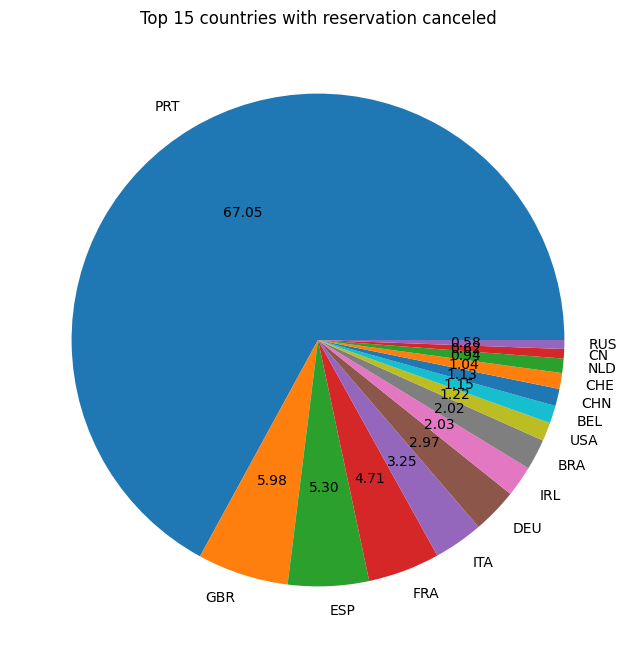

In [24]:
# Visualize top 10 countries with reservation canceled
cancelled_data= data[data['is_canceled']==1]
top_10_country = cancelled_data['country'].value_counts()[:15]


plt.figure(figsize=(8, 8))  # Set background color to a light brown
plt.title('Top 15 countries with reservation canceled', color="black")
plt.pie(top_10_country, autopct='%.2f', labels=top_10_country.index,)
plt.show()

Categorical columns: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']


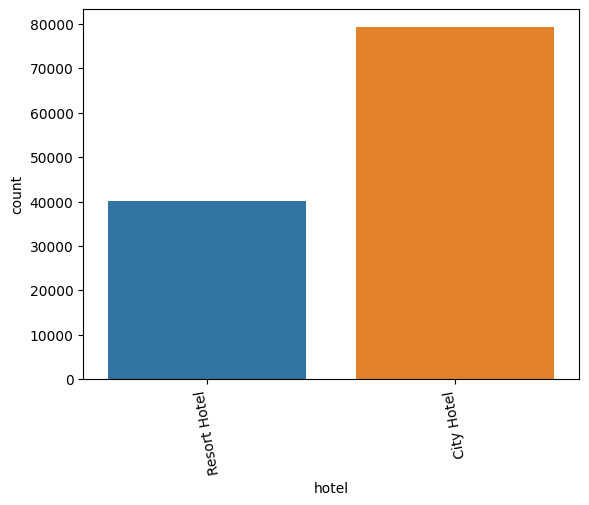

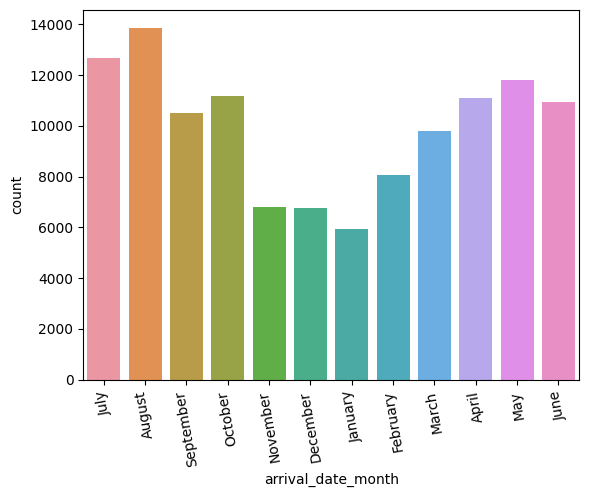

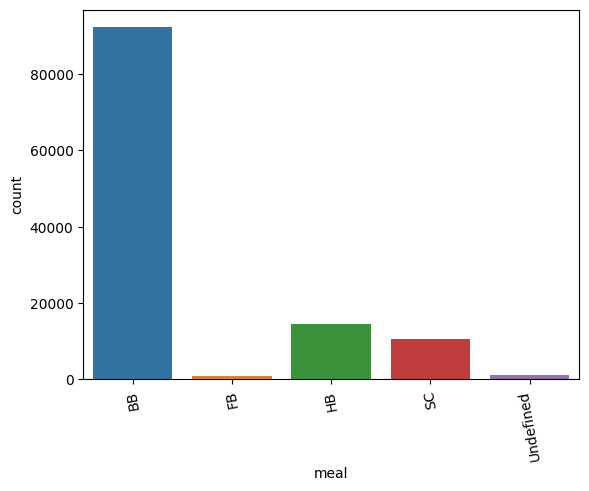

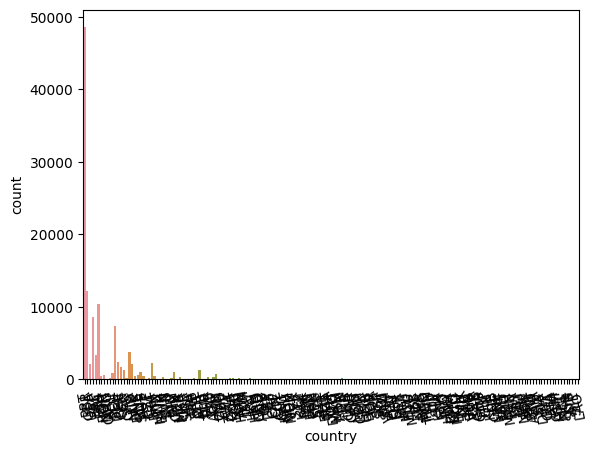

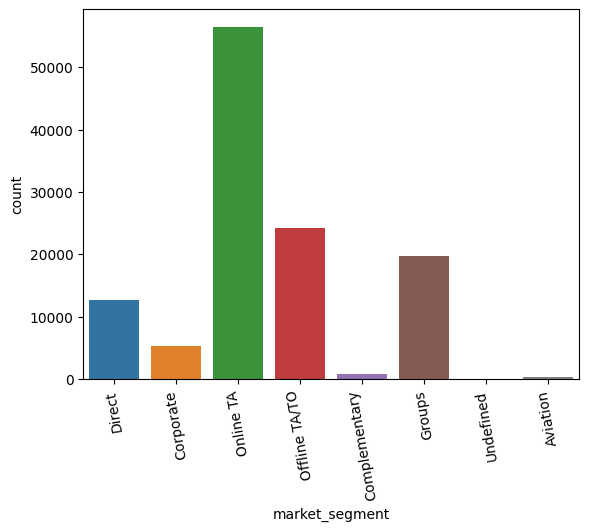

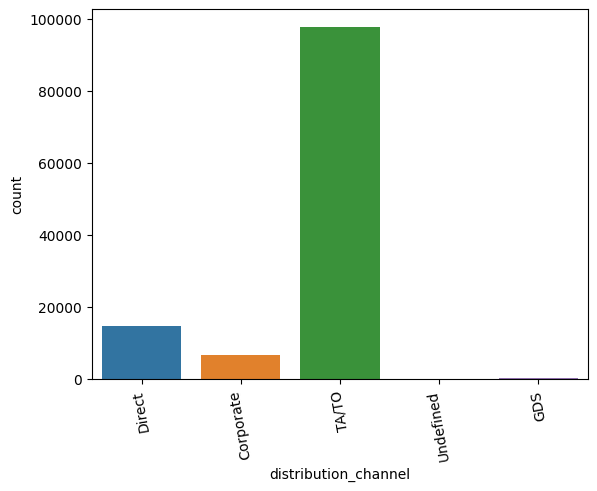

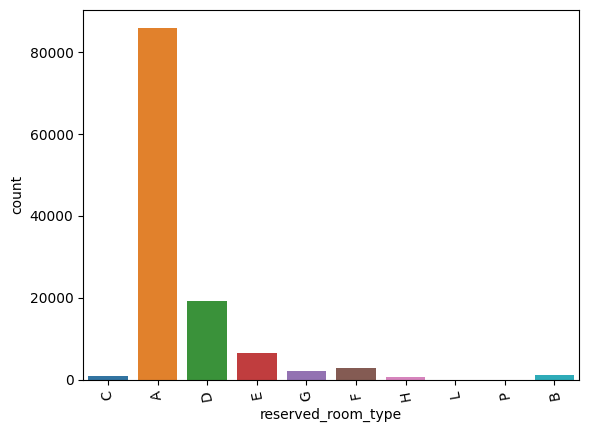

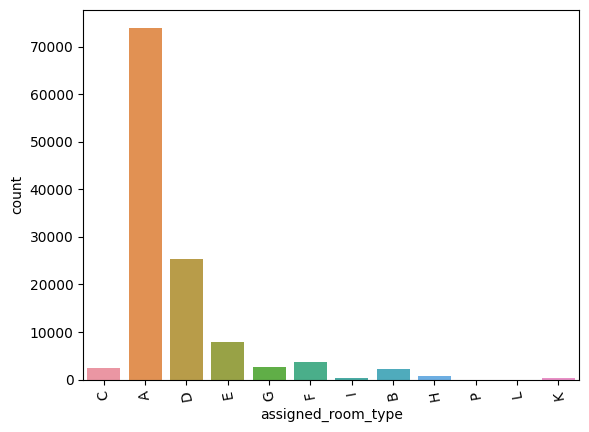

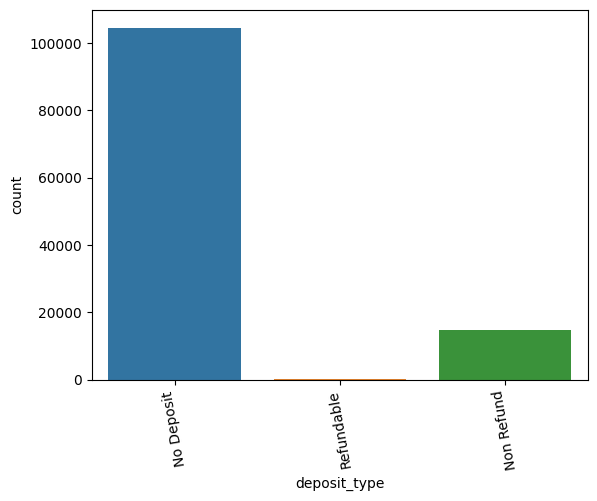

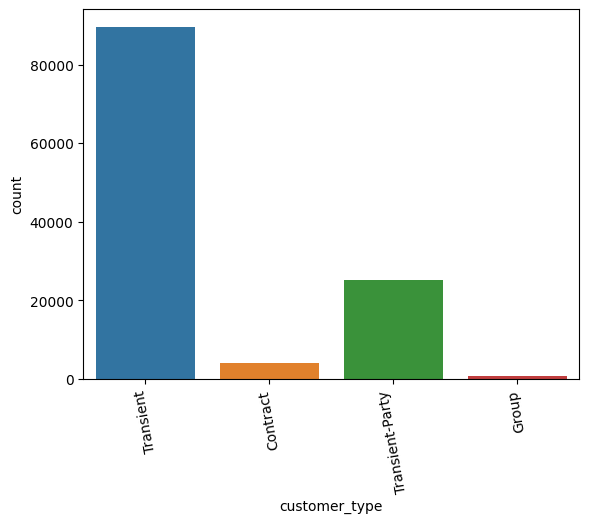

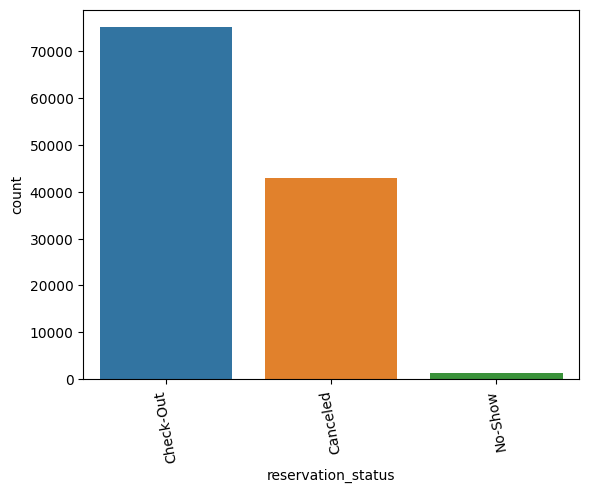

In [7]:
# Get categorical columns
categorical_columns = data.select_dtypes(include = ['object']).columns.tolist()
print("Categorical columns: " + str(categorical_columns))

for column in categorical_columns:
    sns.countplot(data=data, x=column)
    plt.xticks(rotation=100)
    plt.show()


In [37]:

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert non-numeric columns to values
for column in categorical_columns:
    # Convert the column to string type to avoid type conflicts
    data[column] = data[column].astype(str)
    # Apply LabelEncoder
    data[column] = label_encoder.fit_transform(data[column])

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int32  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int32  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [38]:
print(data['is_canceled'].info())

<class 'pandas.core.series.Series'>
Int64Index: 119390 entries, 0 to 119389
Series name: is_canceled
Non-Null Count   Dtype
--------------   -----
119390 non-null  int64
dtypes: int64(1)
memory usage: 1.8 MB
None


                                is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.293123           0.016660   
lead_time                          0.293123   1.000000           0.040142   
arrival_date_year                  0.016660   0.040142           1.000000   
arrival_date_week_number           0.008148   0.126871          -0.540561   
arrival_date_day_of_month         -0.006130   0.002268          -0.000221   
stays_in_weekend_nights           -0.001791   0.085671           0.021497   
stays_in_week_nights               0.024765   0.165799           0.030883   
adults                             0.060017   0.119519           0.029635   
children                           0.005048  -0.037622           0.054624   
babies                            -0.032491  -0.020915          -0.013192   
is_repeated_guest                 -0.084793  -0.124410           0.010341   
previous_cancellations             0.110133   0.086042          -0.119822   

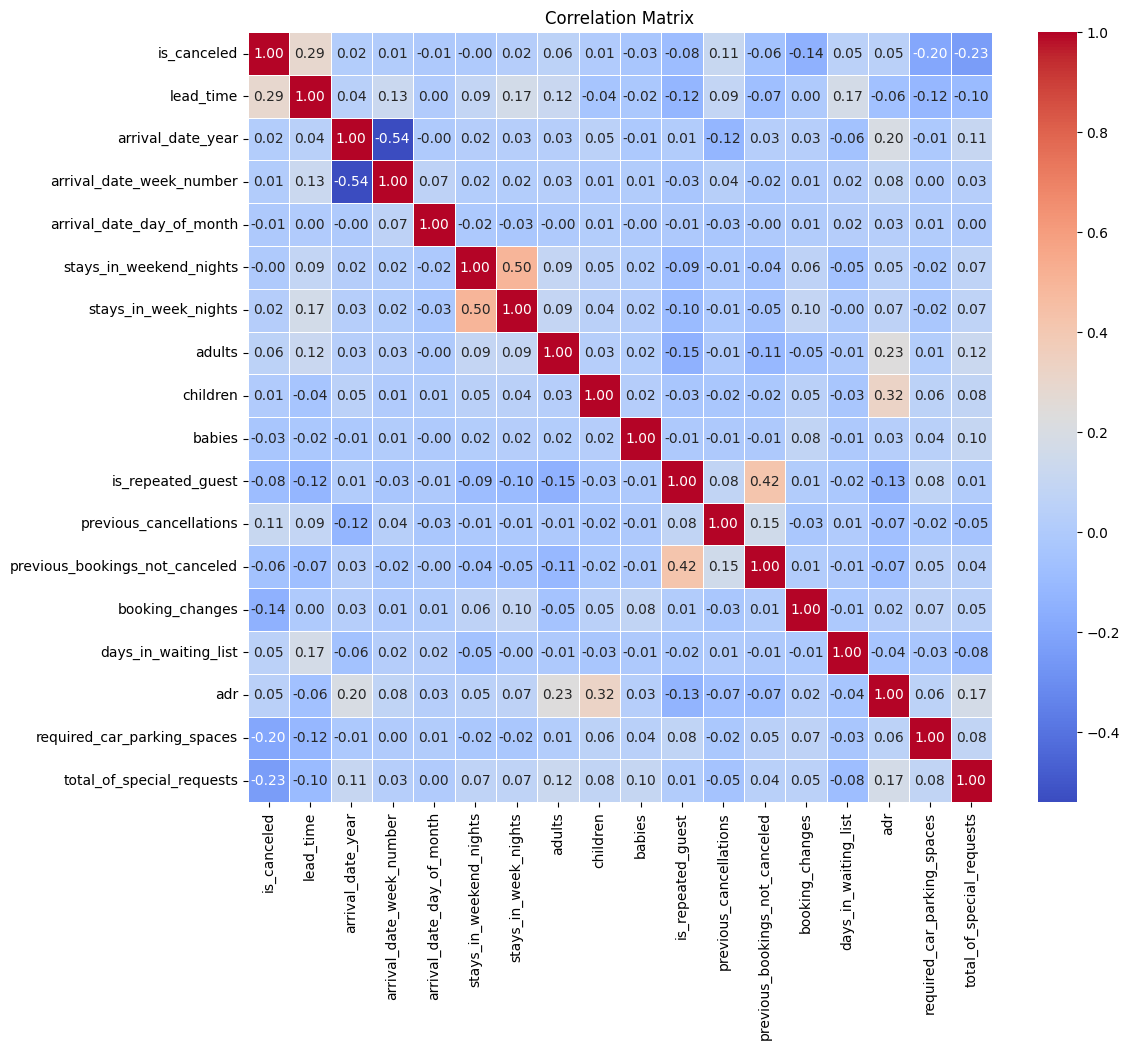

In [9]:
# Let's check the correlation between variables 
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
correlation_num = data[numerical_columns].corr()
print(correlation_num)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_num, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [38]:
 #Extrai os 3 pares mais bem correlacionados (em termos absolutos), sem contar as correlações de uma variável com ela mesma
correlation_pairs = correlation_num.unstack().reset_index()
correlation_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
correlation_pairs['Correlation'] = correlation_pairs['Correlation'].abs()  # Usa o valor absoluto

# Filtra para excluir duplicatas e correlações com a mesma variável
correlation_pairs = correlation_pairs[correlation_pairs['Variable 1'] != correlation_pairs['Variable 2']]
correlation_pairs = correlation_pairs.drop_duplicates(subset=['Correlation']).sort_values(by='Correlation', ascending=False)

# Exibe os 3 pares mais bem correlacionados
top_3_correlations = correlation_pairs.head(3)
print("Top 3 most correlated pairs:\n", top_3_correlations)

# Exibe os 3 pares menos bem correlacionados
top_3_correlations = correlation_pairs.tail(3)
print("Top 3 less correlated pairs:\n", top_3_correlations)

Top 3 most correlated pairs:
                   Variable 1                      Variable 2  Correlation
39         arrival_date_year        arrival_date_week_number     0.540561
96   stays_in_weekend_nights            stays_in_week_nights     0.498969
192        is_repeated_guest  previous_bookings_not_canceled     0.418056
Top 3 less correlated pairs:
                    Variable 1                 Variable 2  Correlation
81  arrival_date_day_of_month                     babies     0.000230
40          arrival_date_year  arrival_date_day_of_month     0.000221
31                  lead_time            booking_changes     0.000149


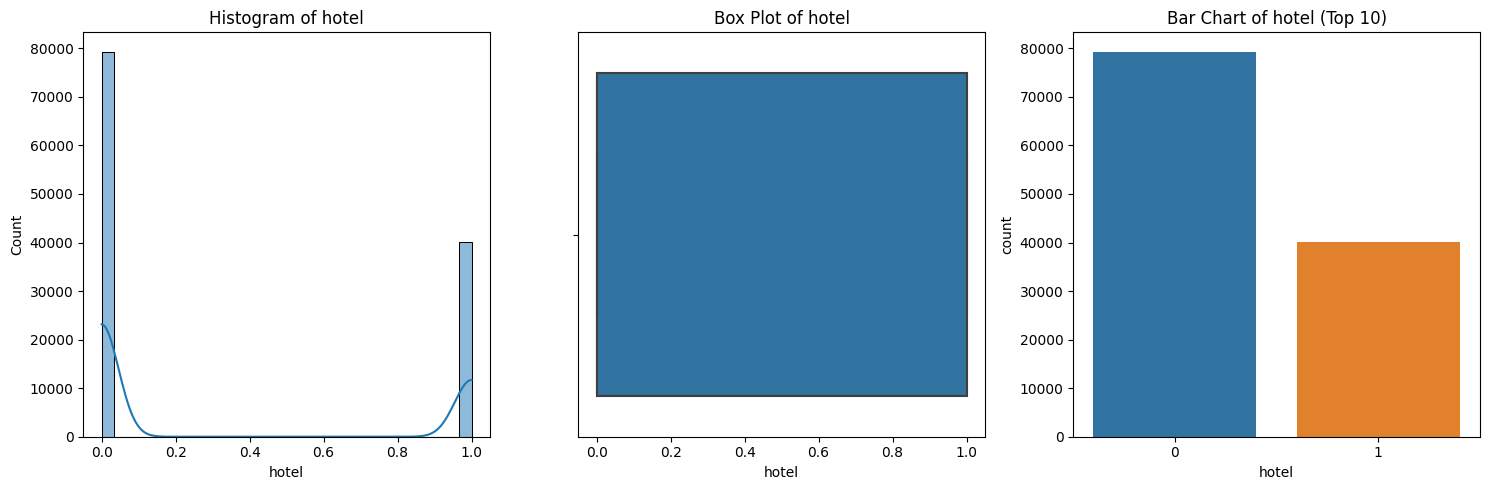

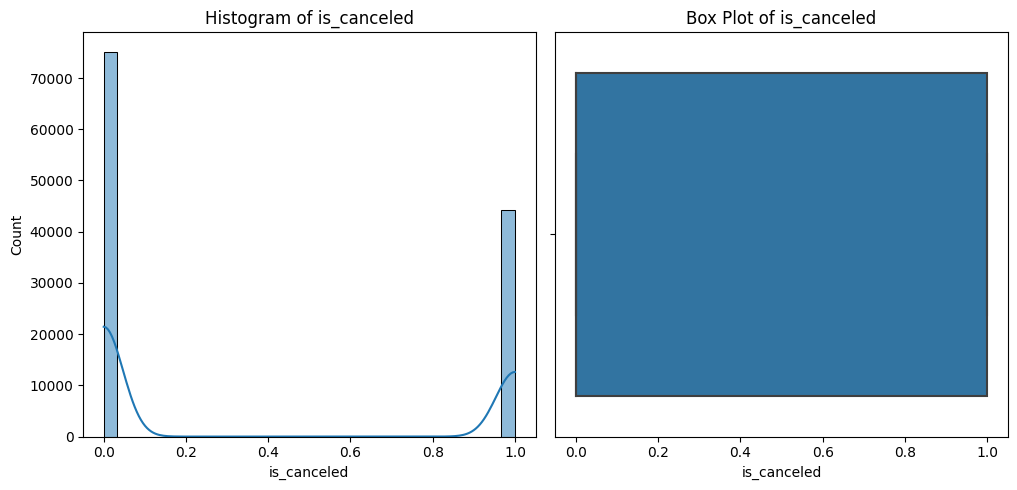

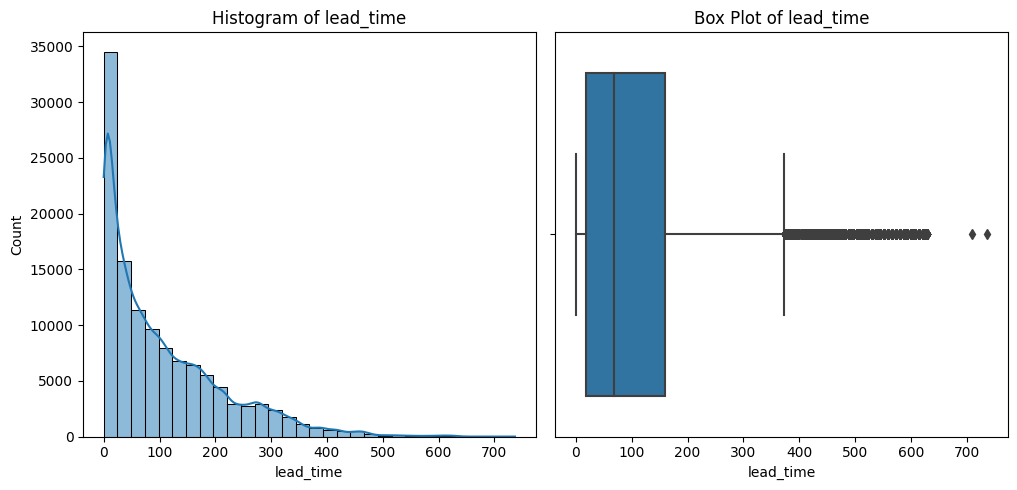

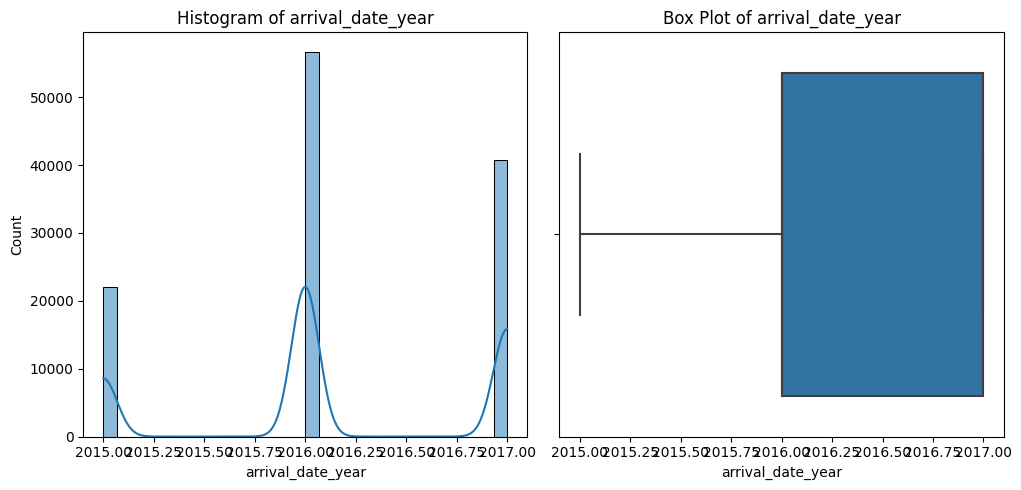

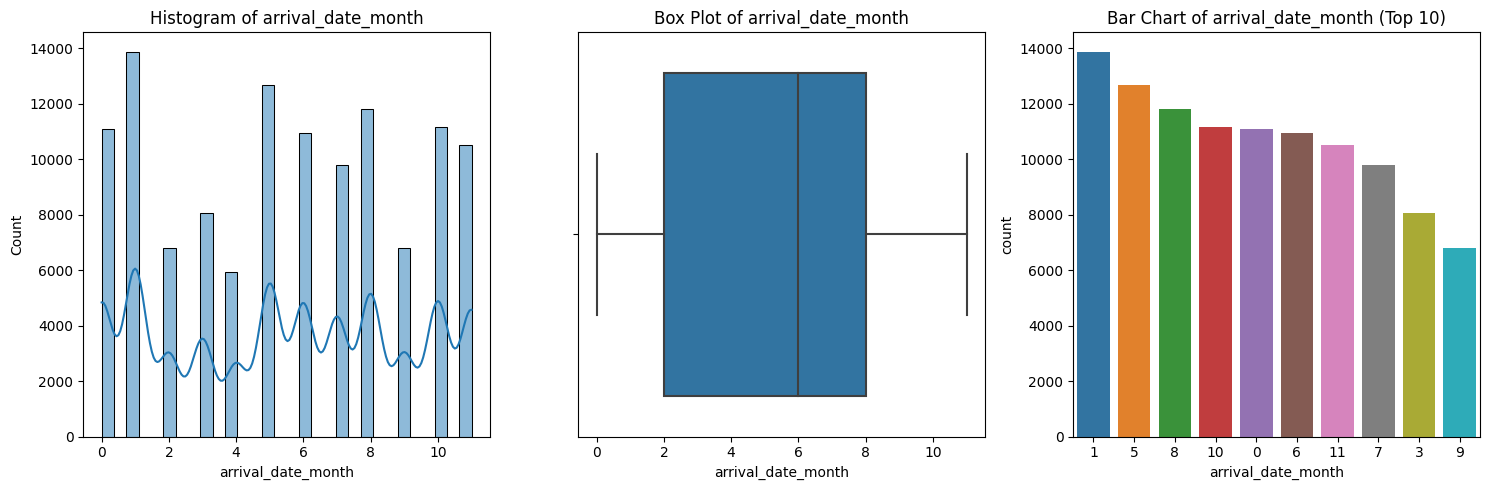

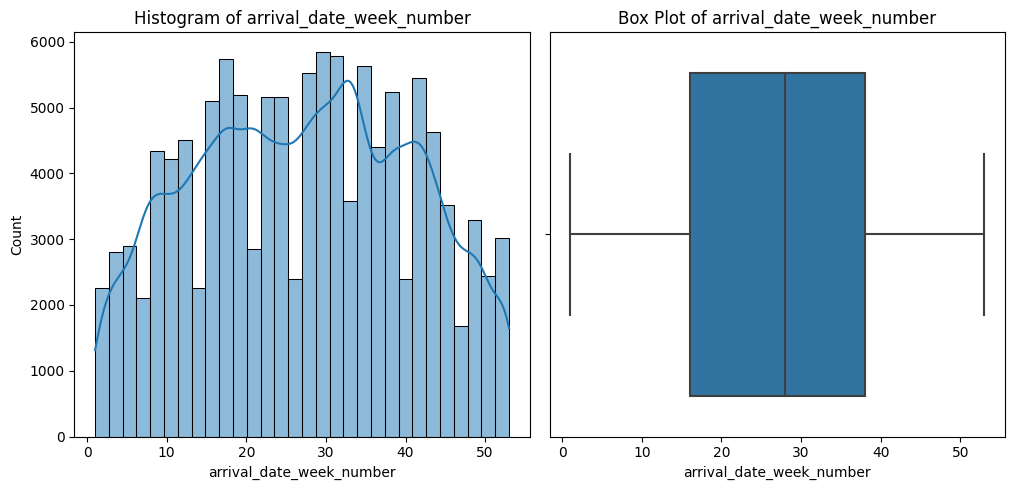

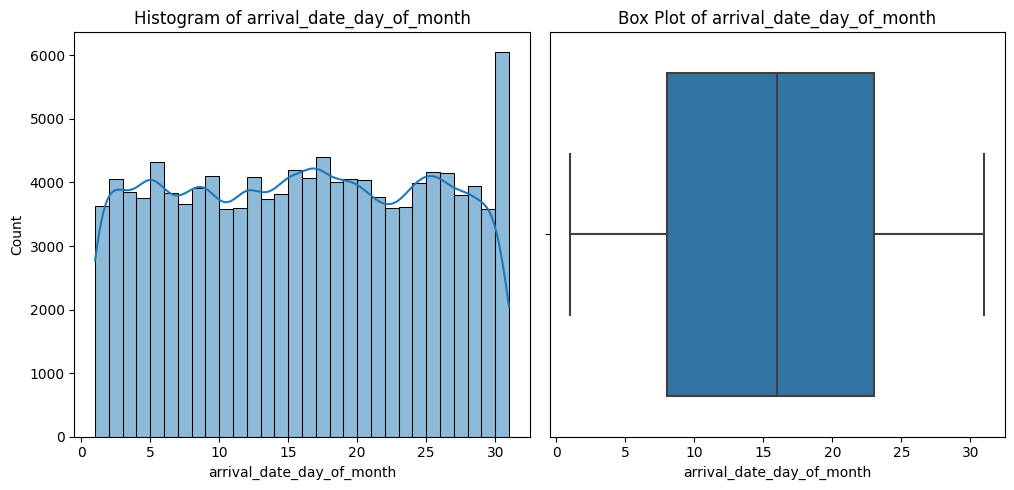

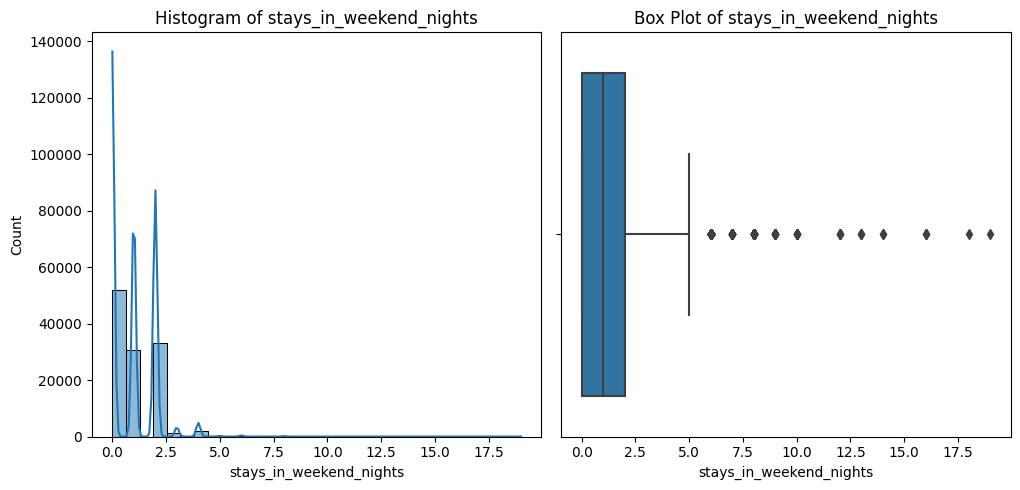

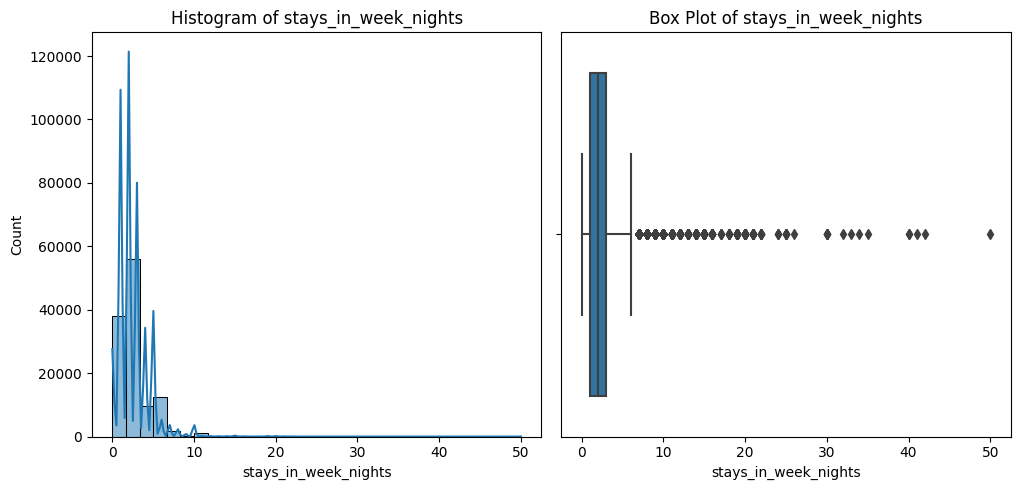

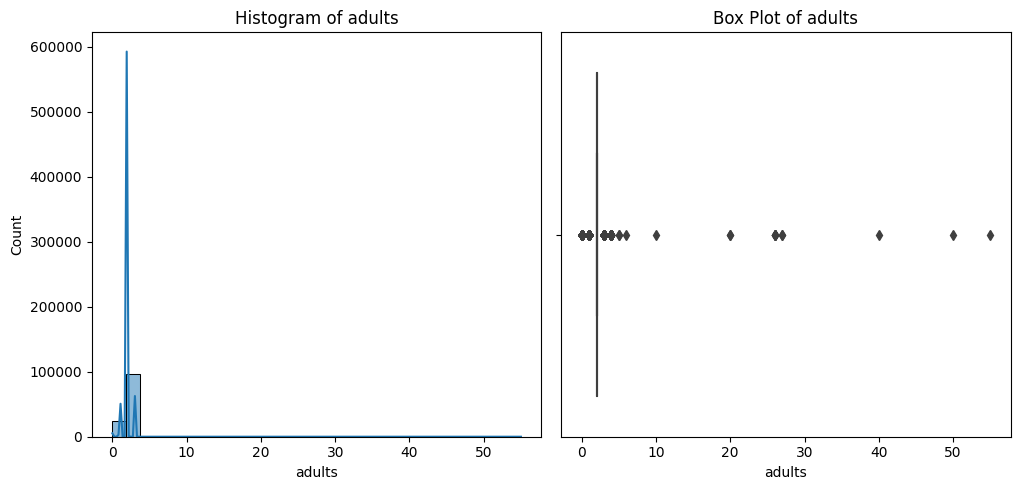

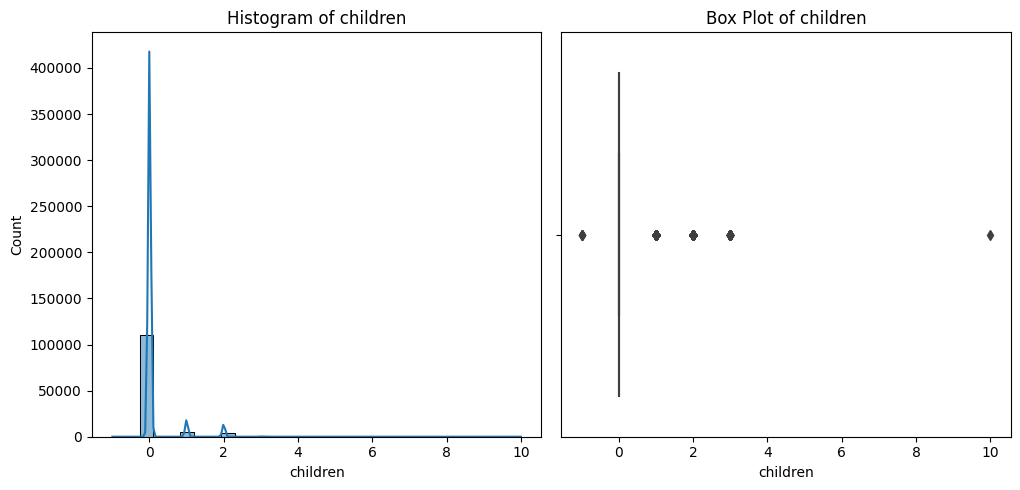

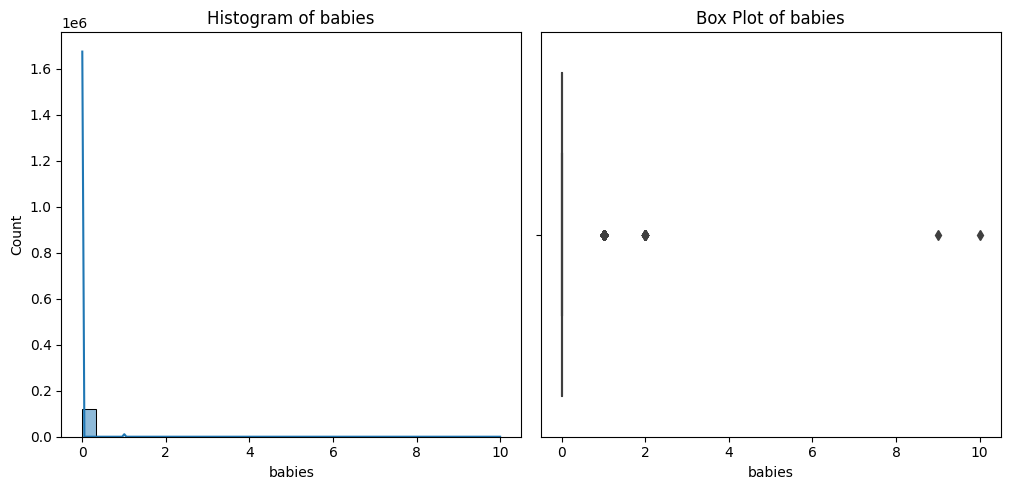

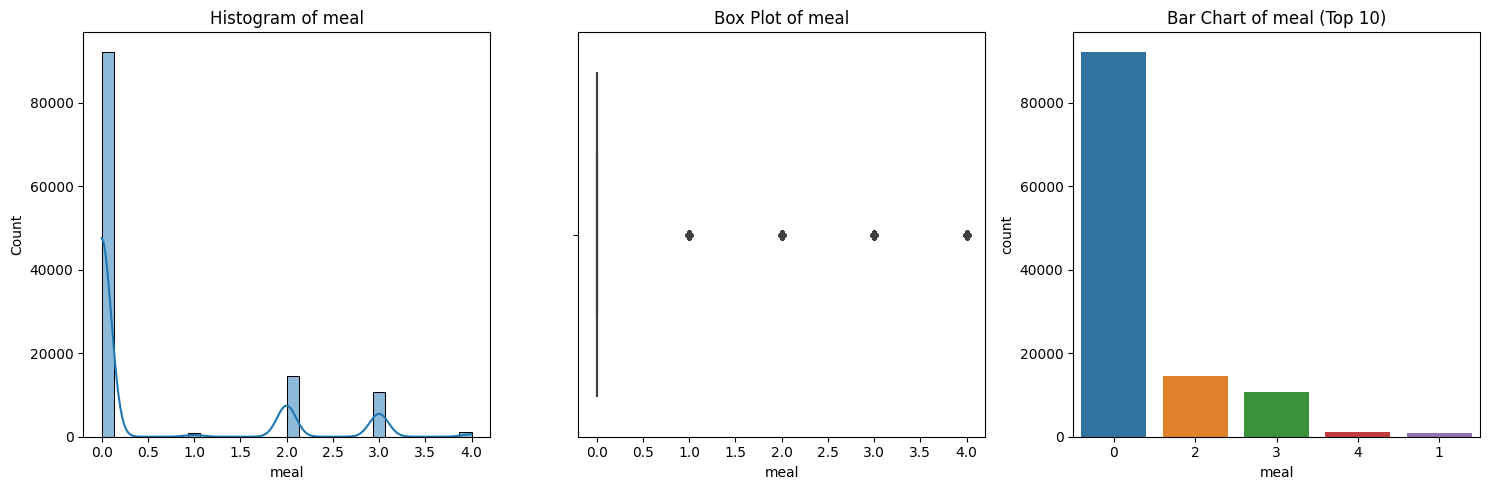

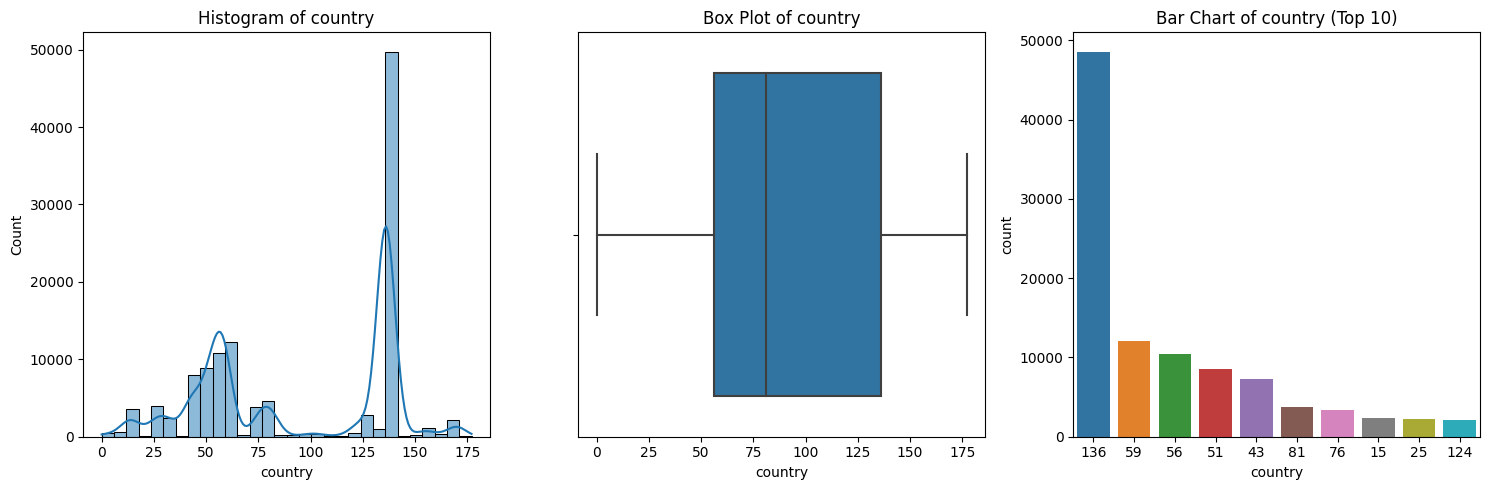

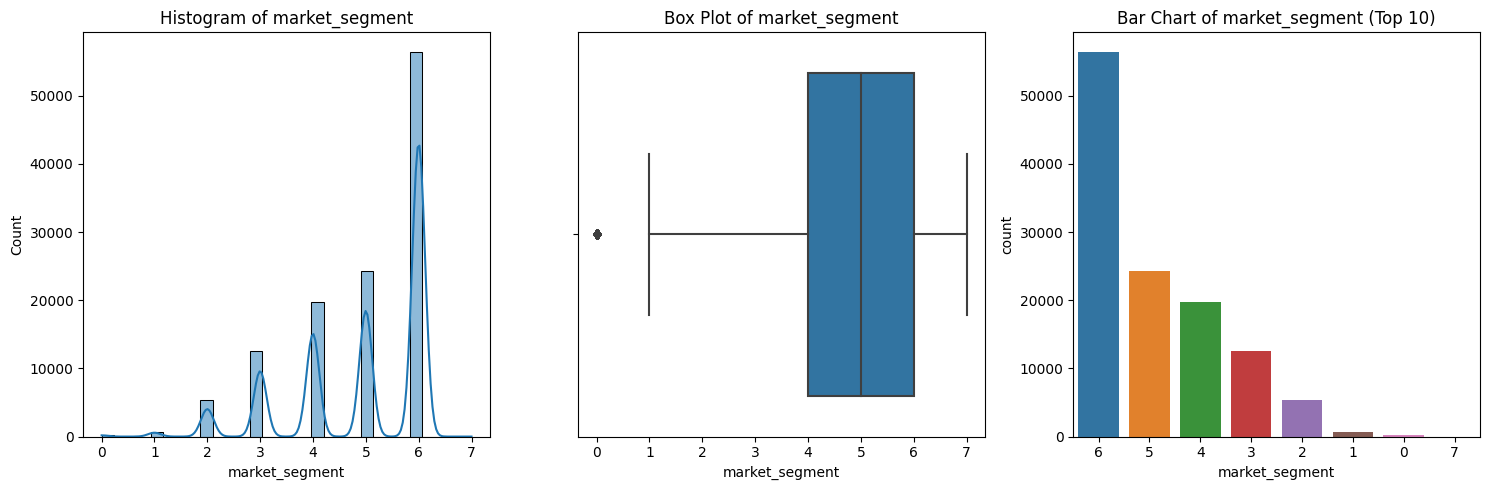

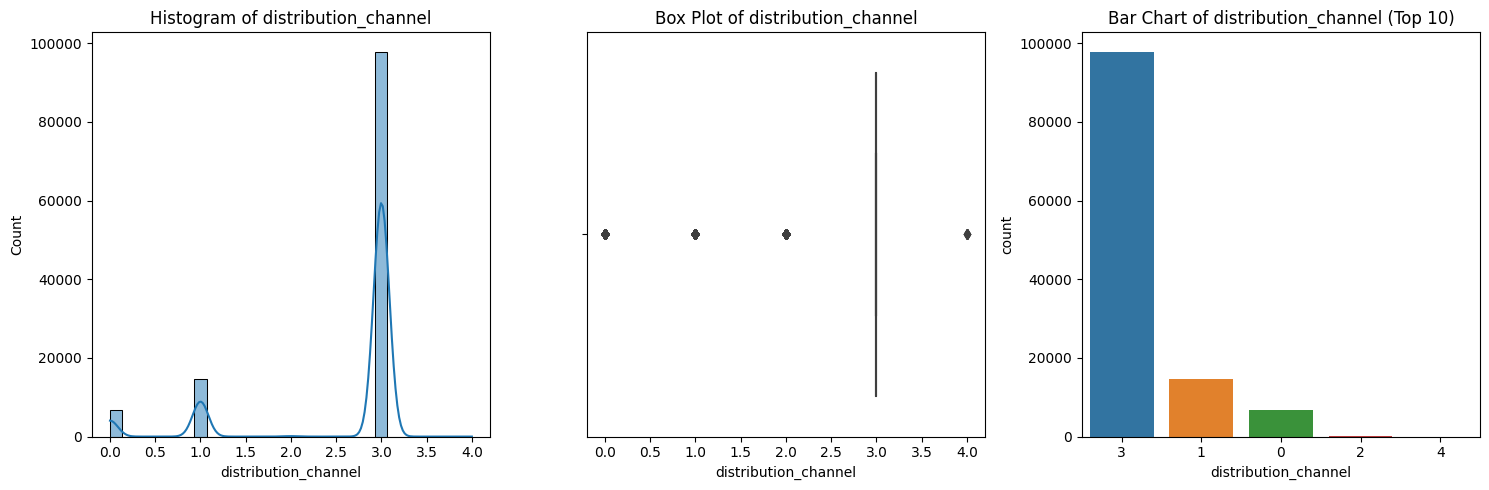

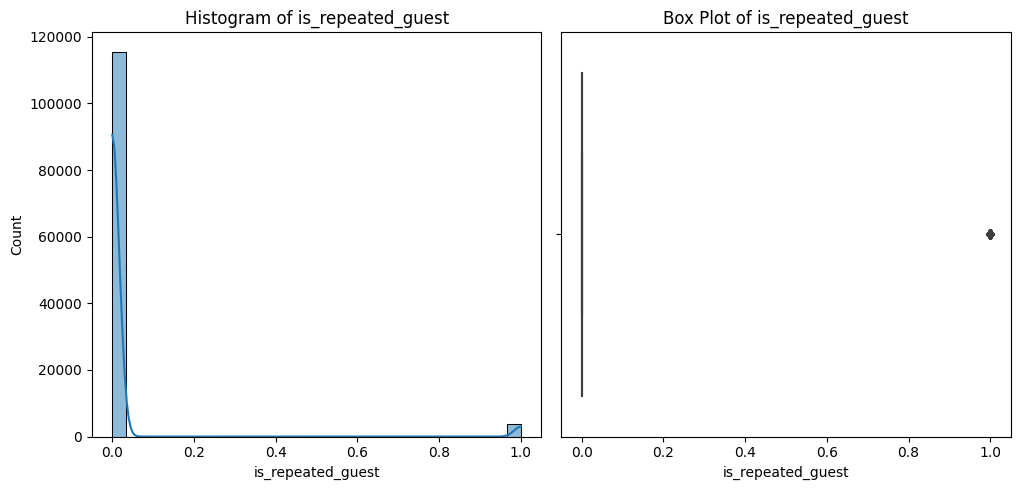

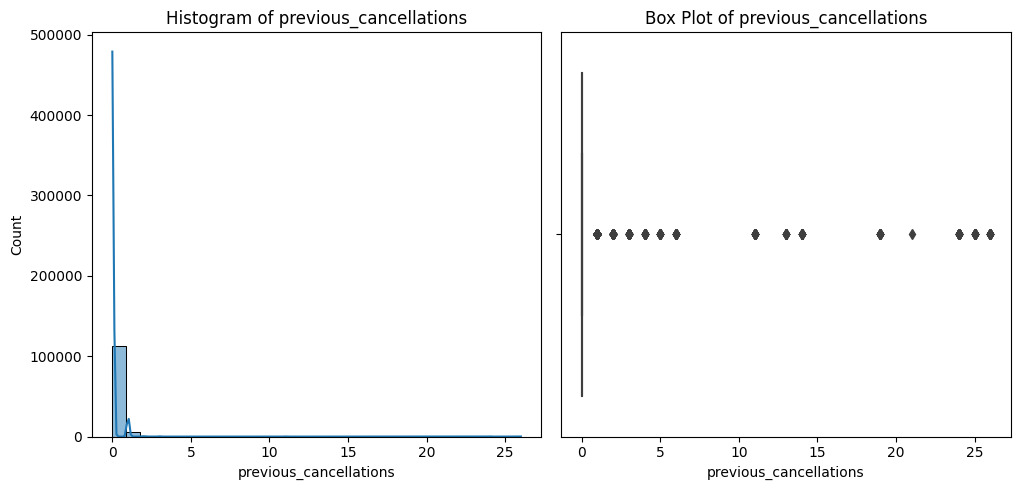

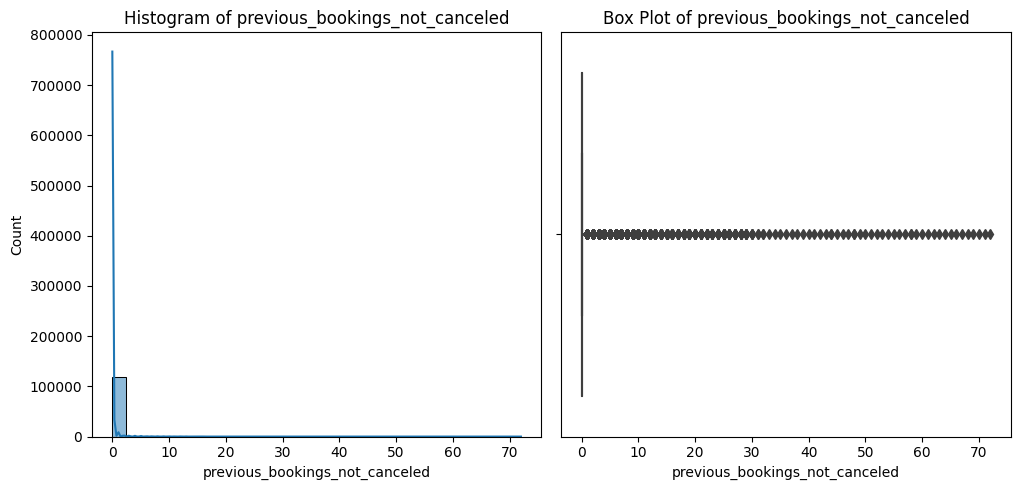

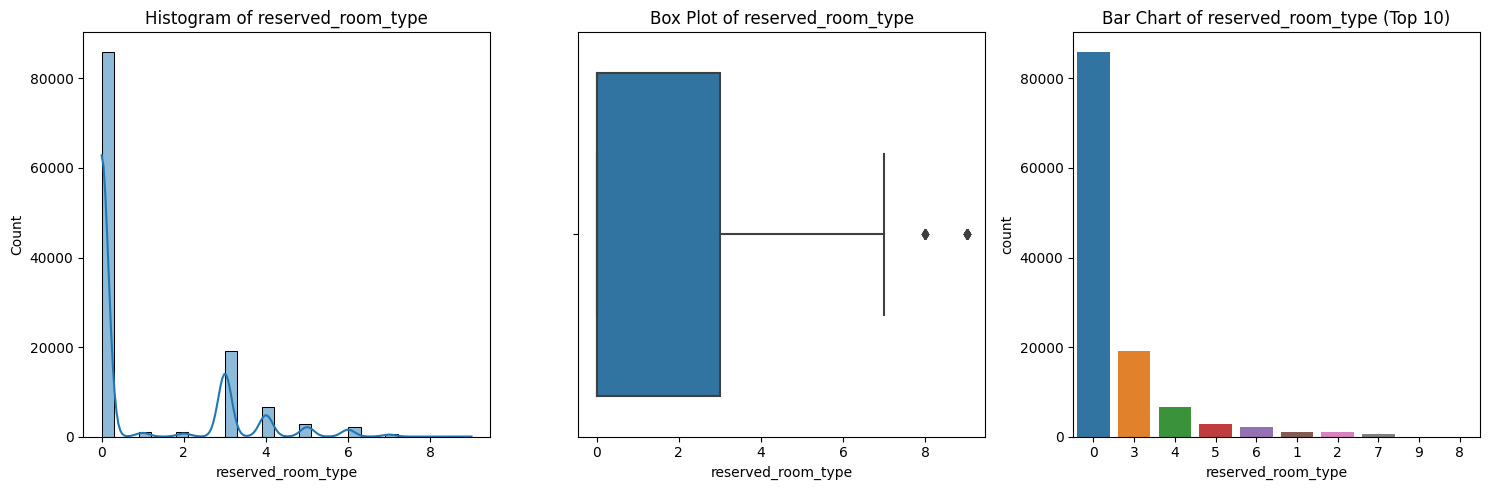

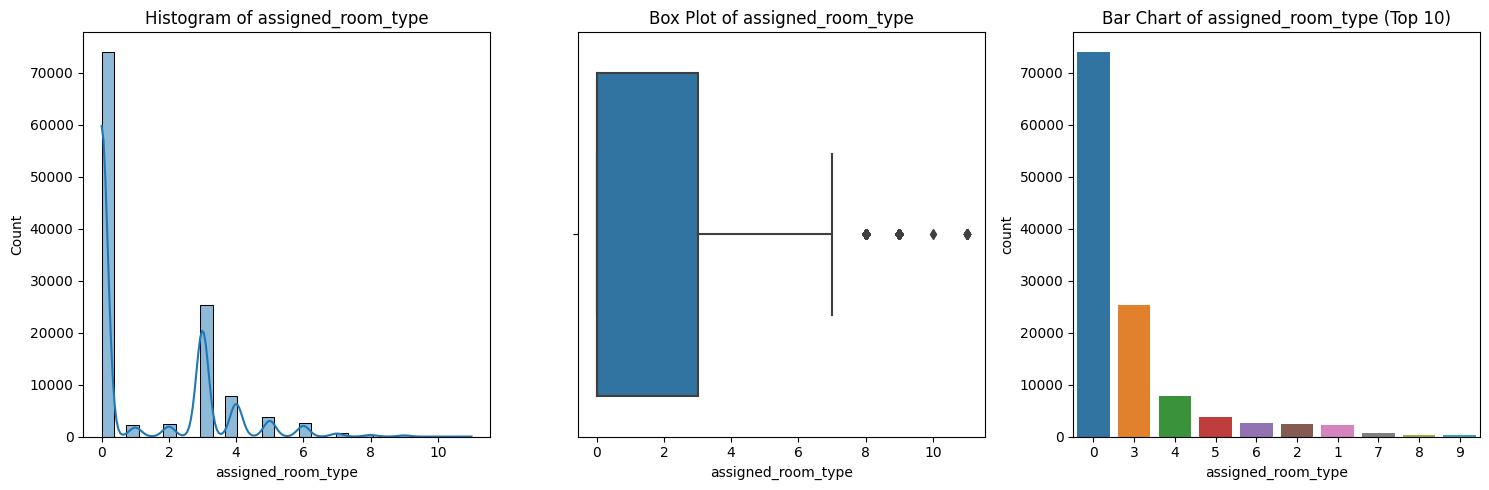

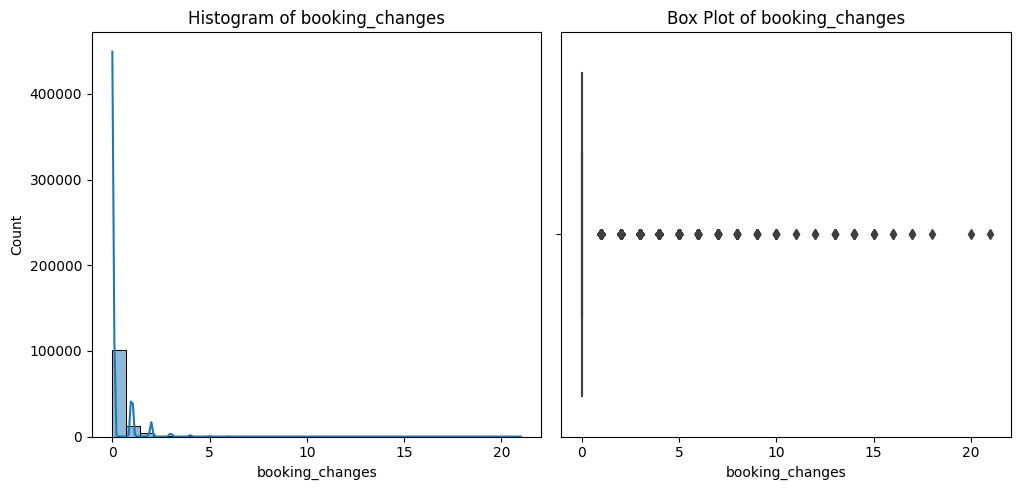

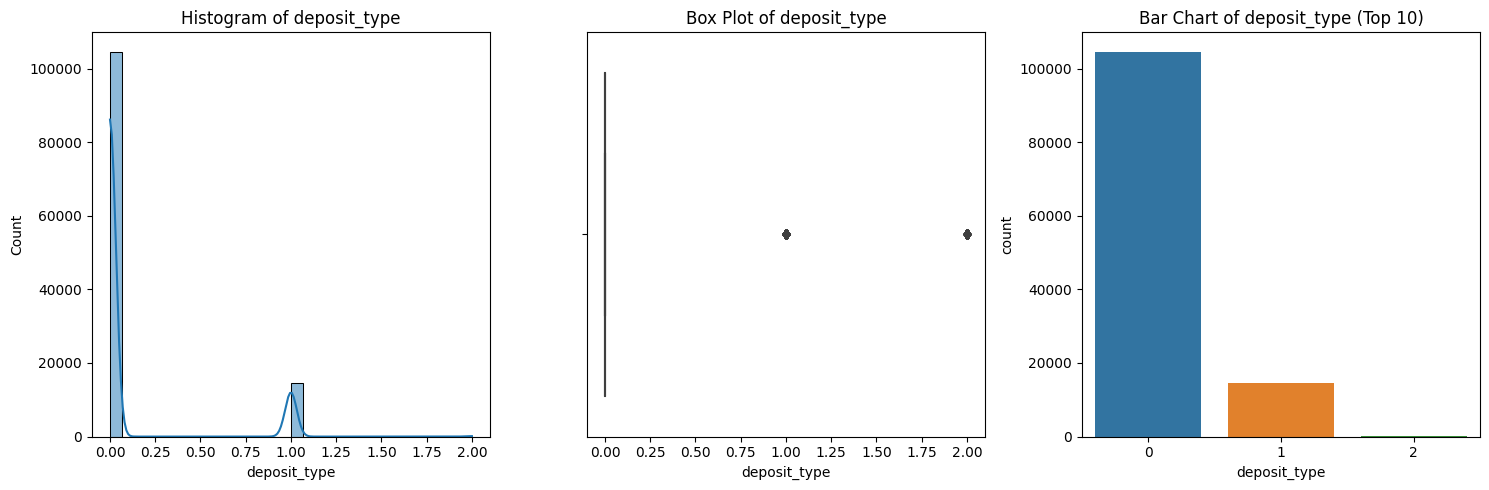

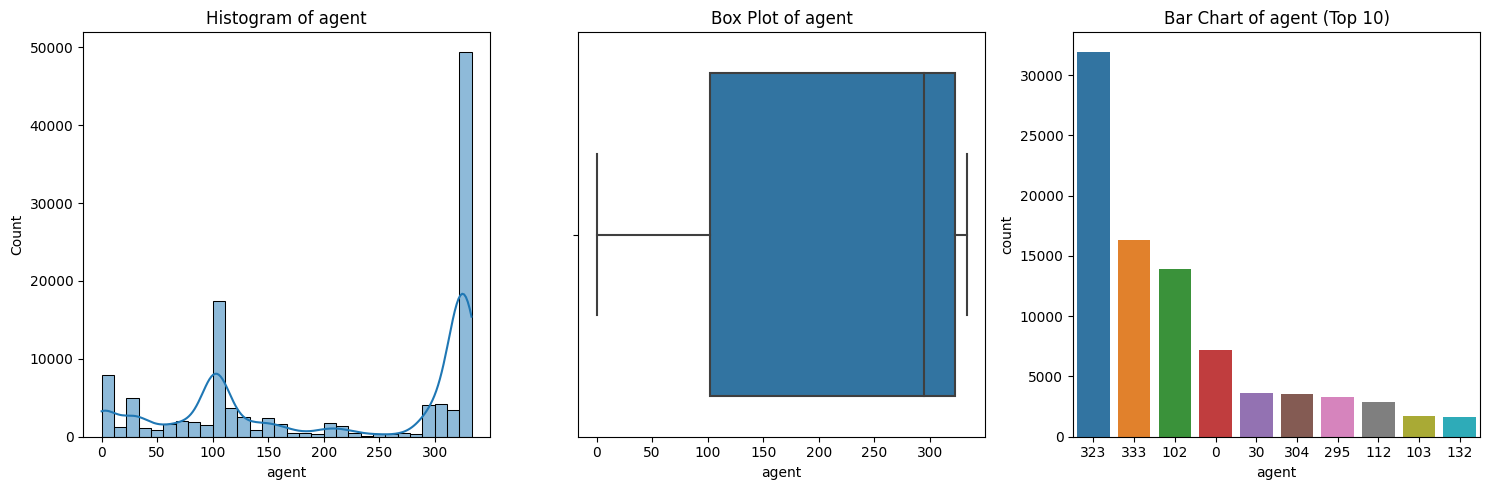

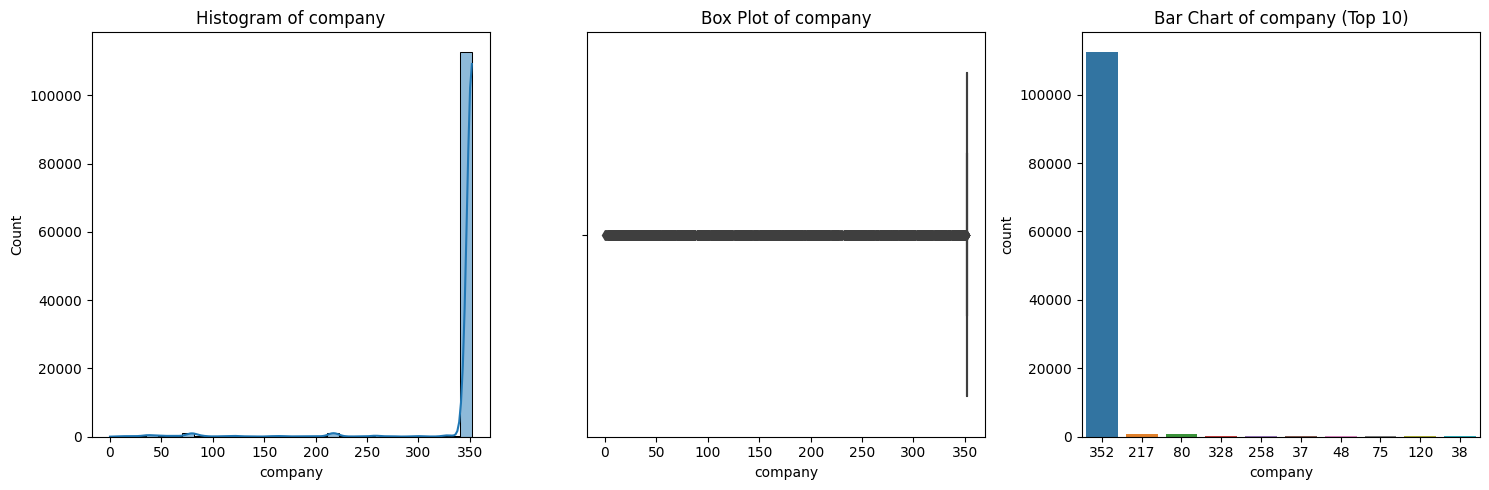

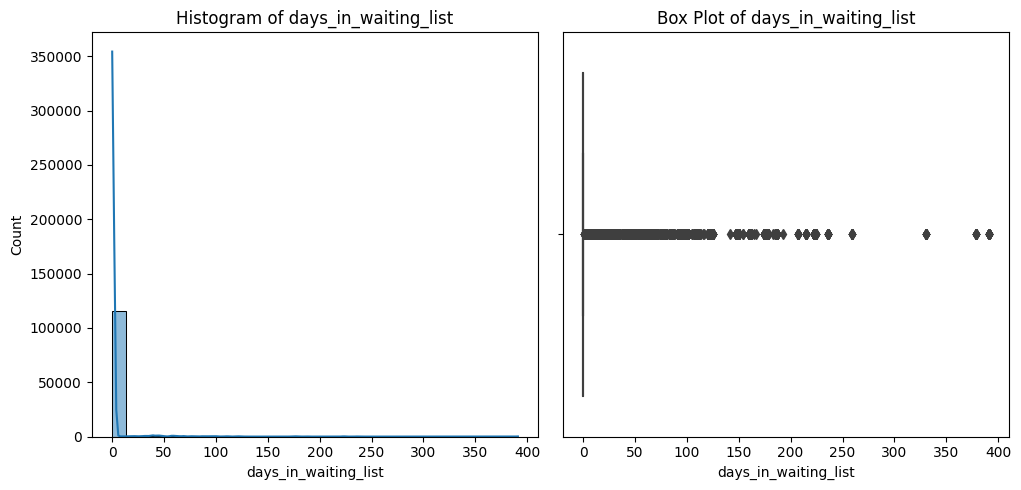

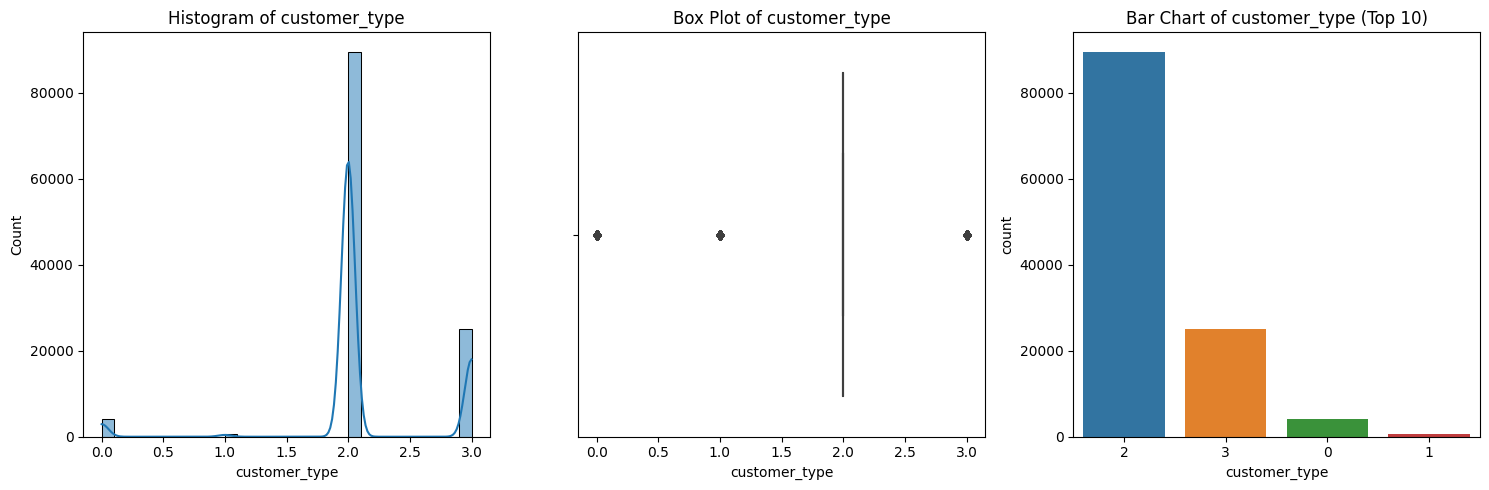

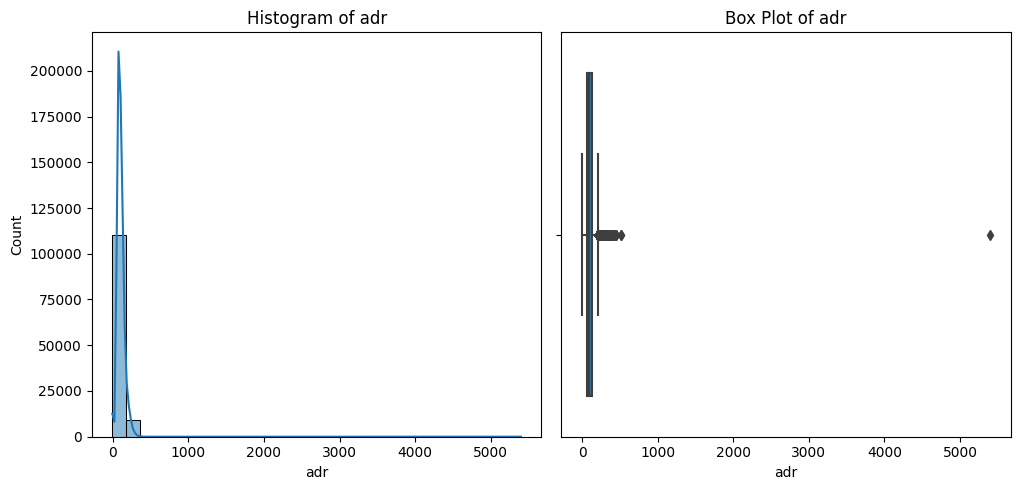

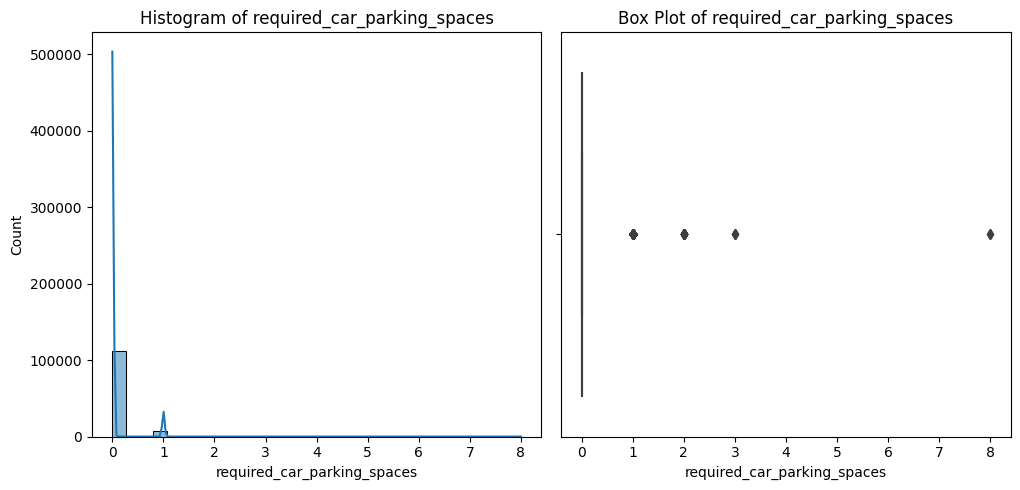

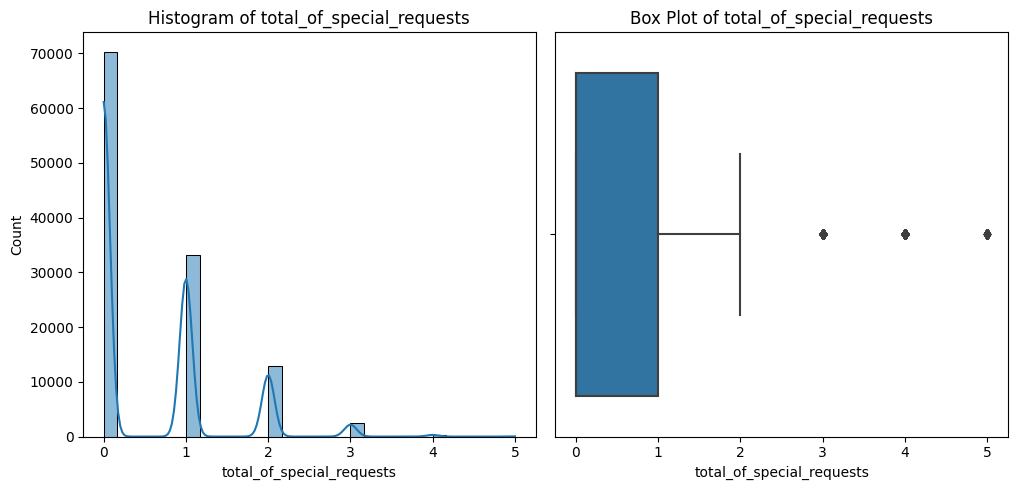

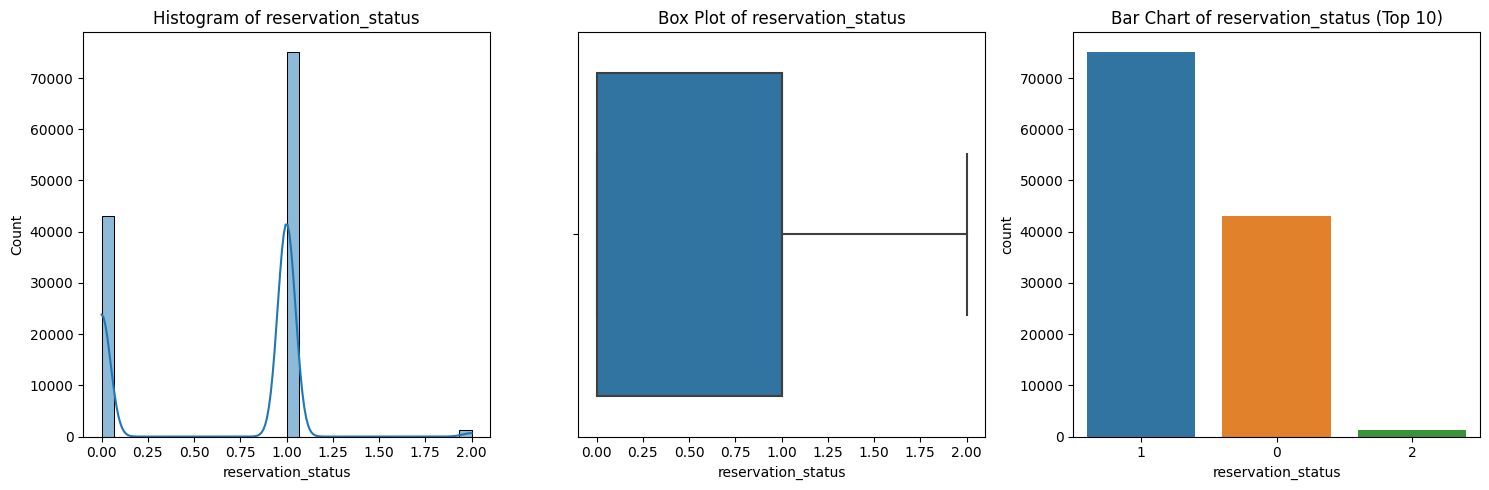

TypeError: could not convert string to float: '2015-07-01'

In [40]:
def univariate_analysis(data, column_name):
    describe= data[column_name].describe()
    variance_value = data[column_name].var()
    iqr_value = data[column_name].quantile(0.75) - data[column_name].quantile(0.25)
    skewness_value = data[column_name].skew()
    kurtosis_value = data[column_name].kurtosis()

    frequency_distribution = data[column_name].value_counts().head(10)

     # Visualization
    plt.figure(figsize=(15, 5))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data[column_name], kde=True, bins=30)
    plt.title(f'Histogram of {column_name}')

    # Box Plot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=data[column_name])
    plt.title(f'Box Plot of {column_name}')

   
    # Bar Chart (for categorical features)
    if data[column_name].dtype == 'int' or data[column_name].dtype == 'object':
        plt.subplot(1, 3, 3)
        sns.countplot(x=data[column_name], order=data[column_name].value_counts().index[:10])
        plt.title(f'Bar Chart of {column_name} (Top 10)')


    plt.tight_layout()
    plt.show()

variables_to_analyse=data.columns
for varible in variables_to_analyse:
    univariate_analysis(data, varible)


C:\Users\carlo\AppData\Local\Temp\ipykernel_3928\3713164749.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=data, x= column_name, hue=Objective_col, kind="kde")


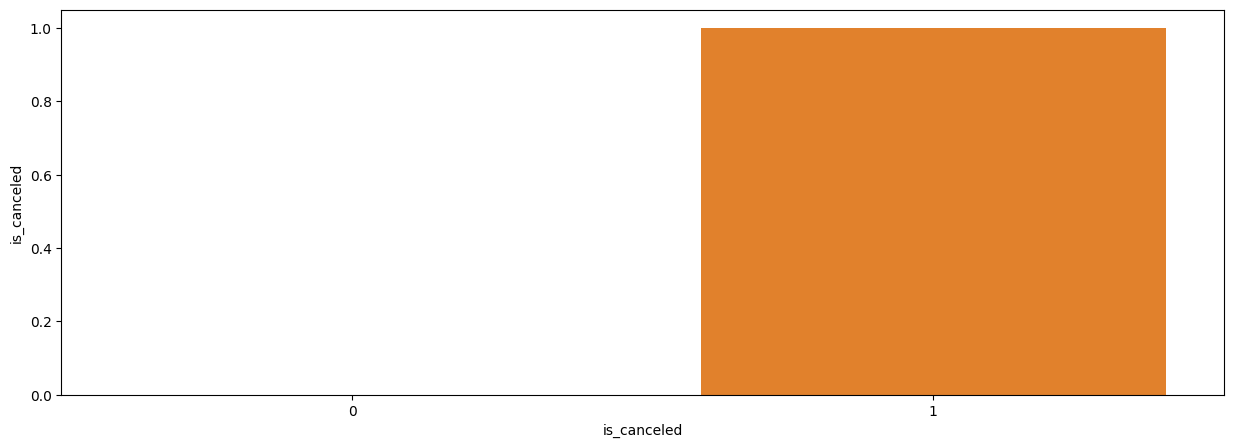

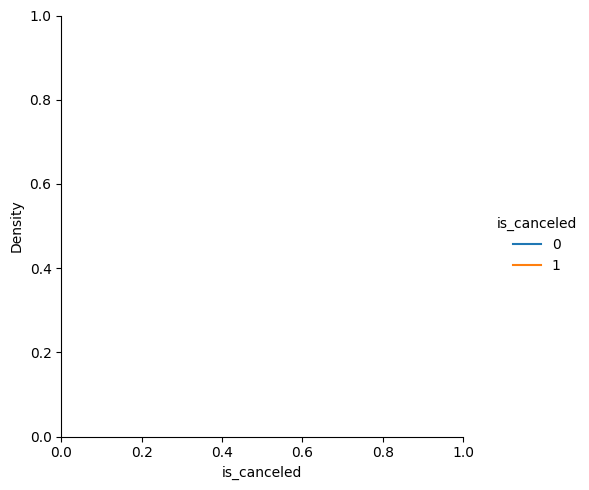

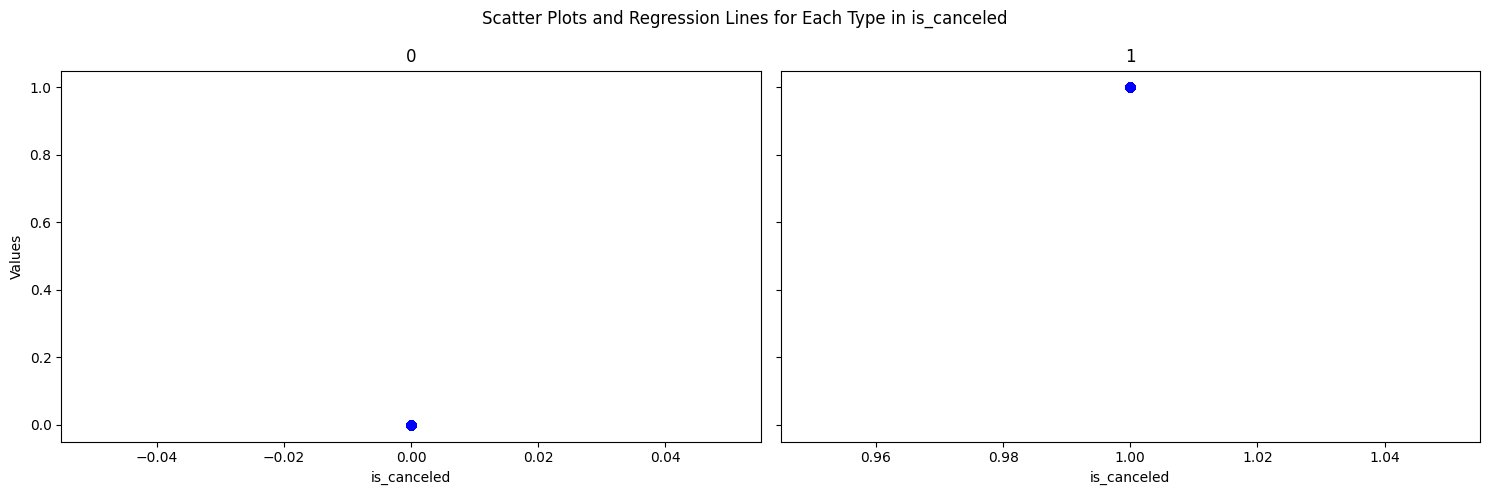

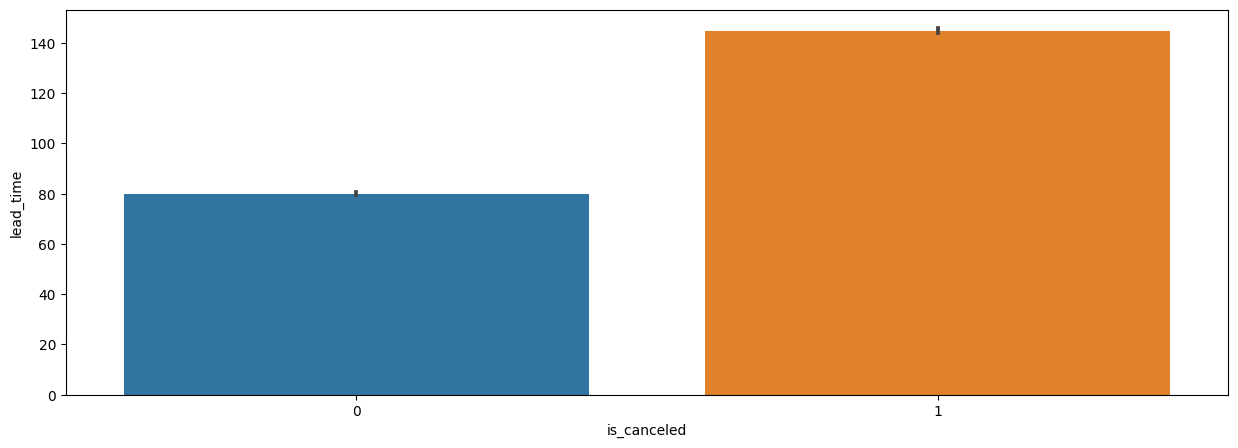

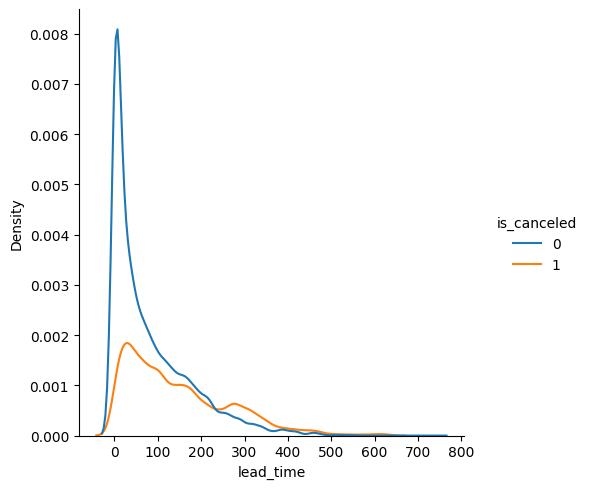

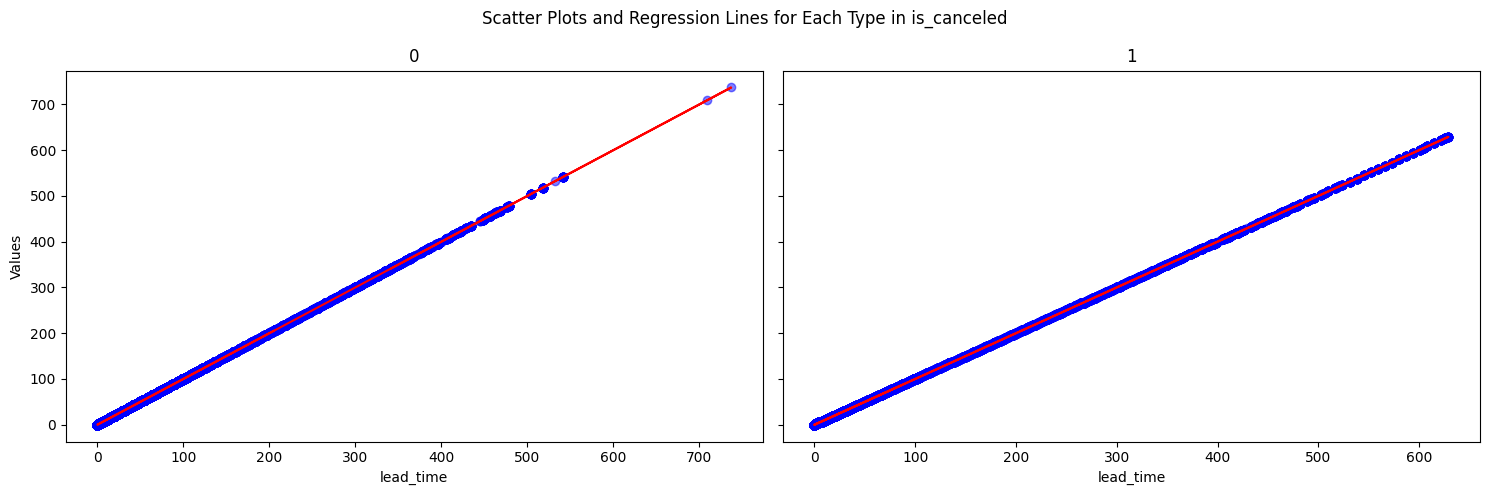

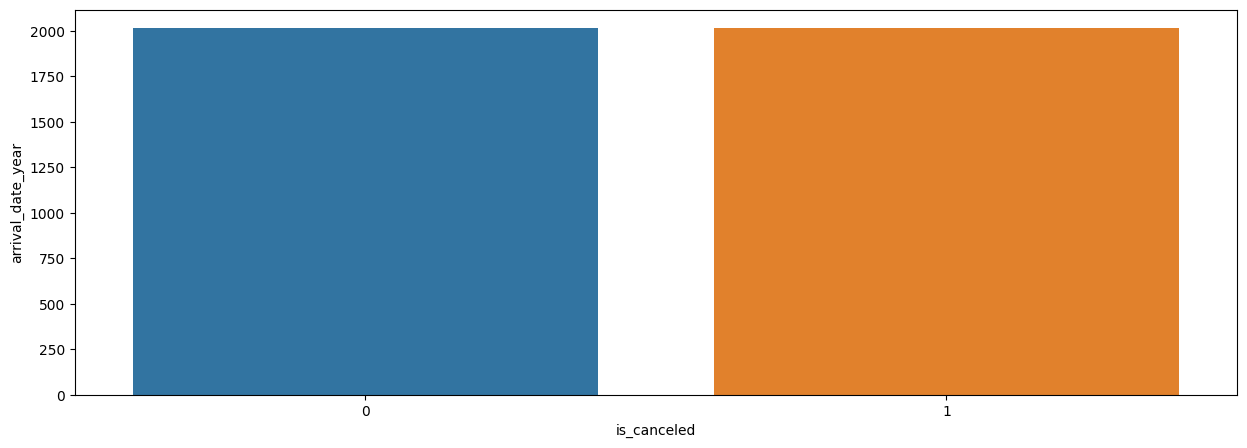

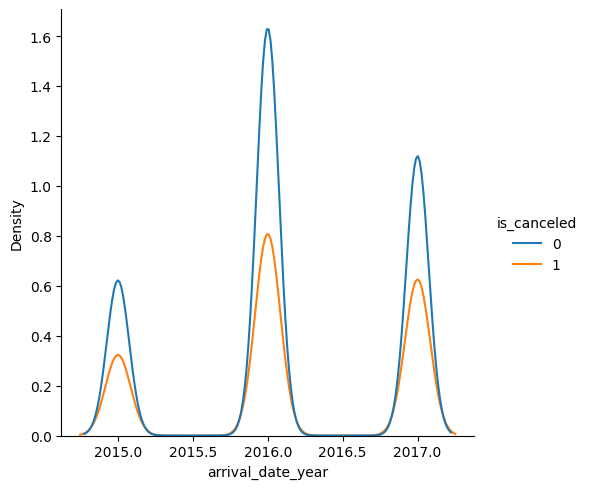

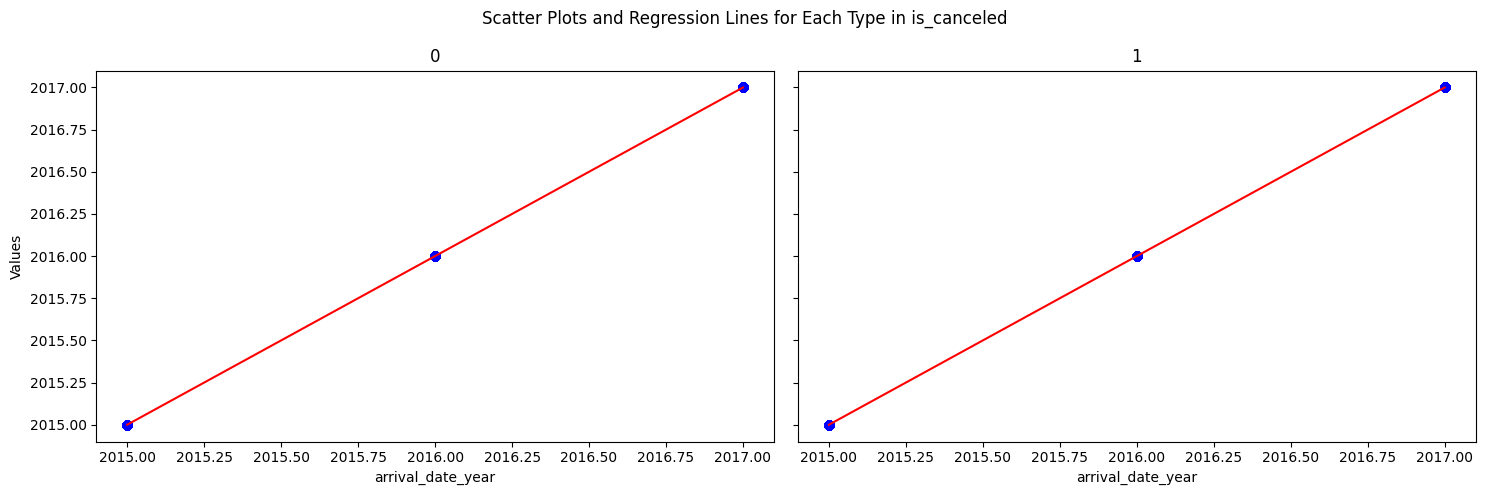

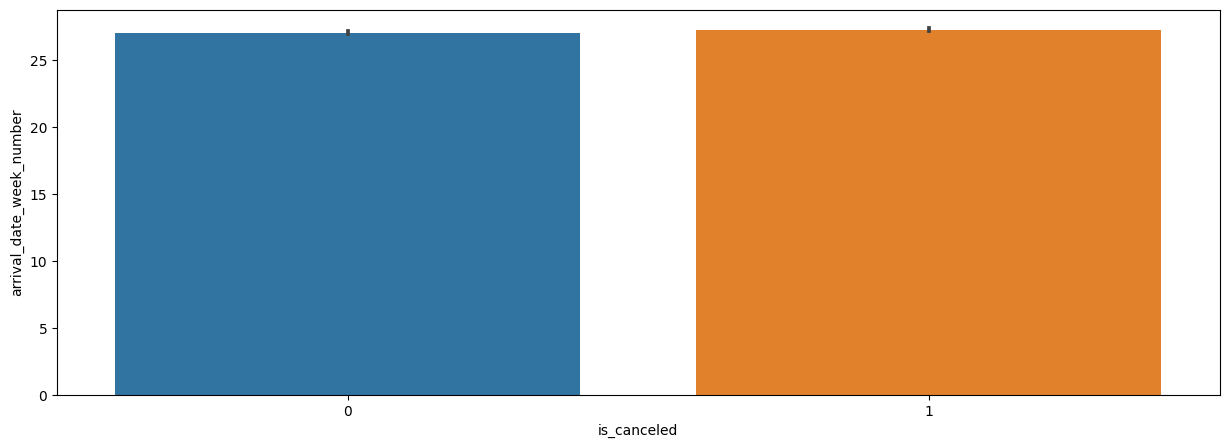

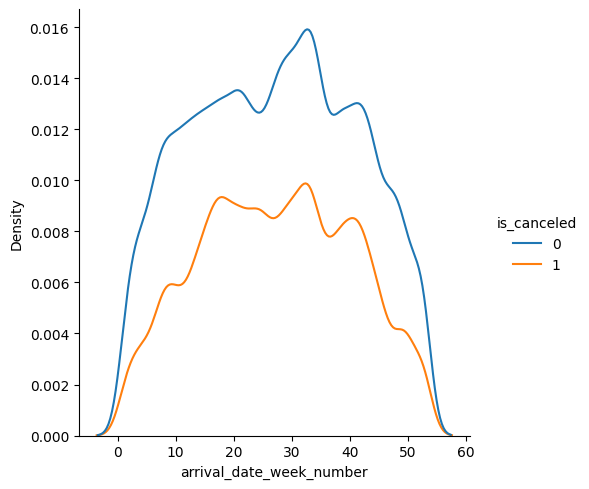

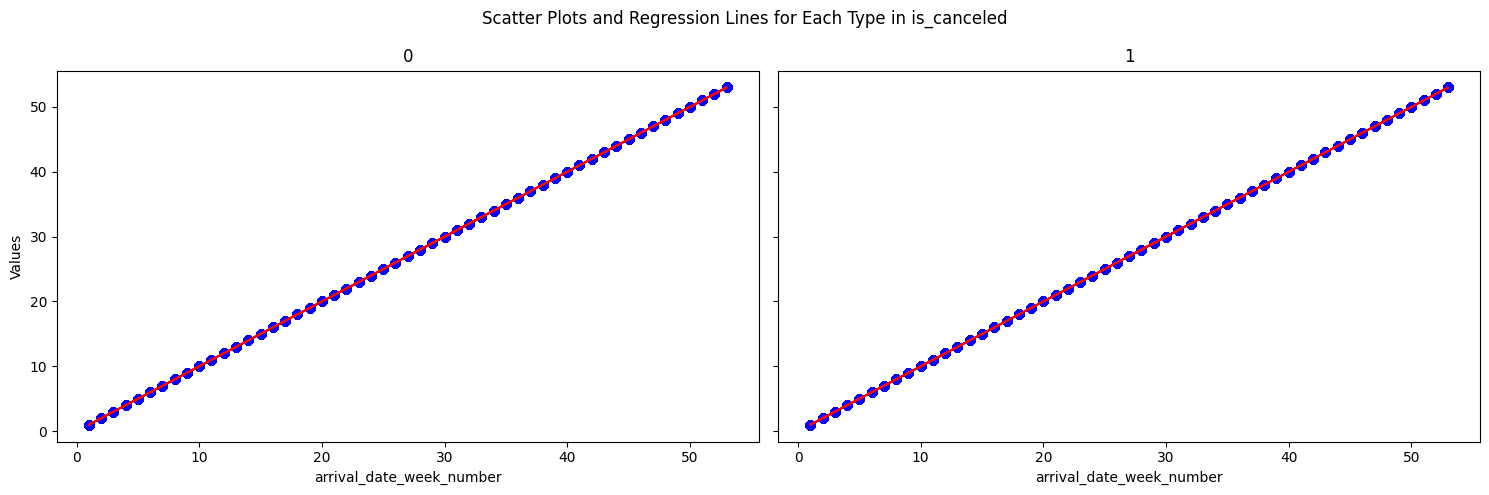

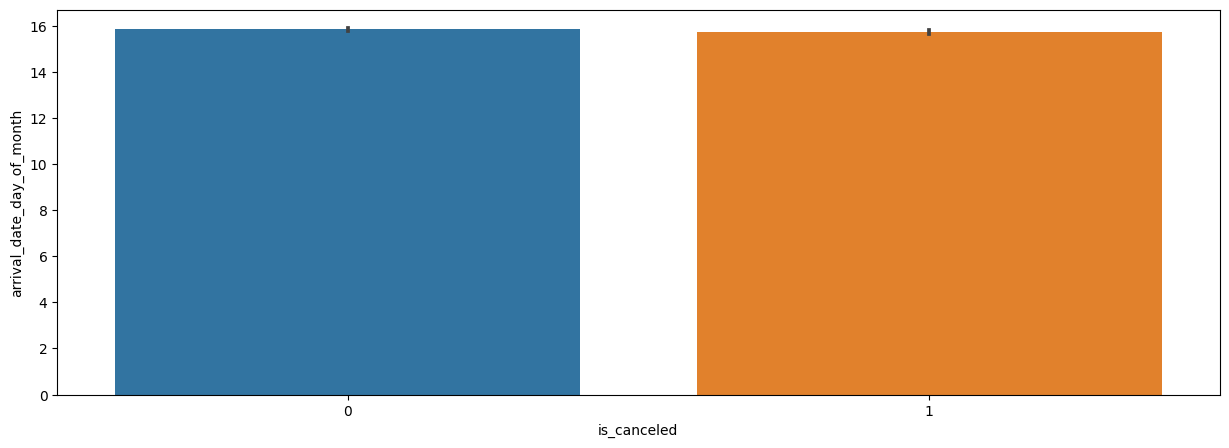

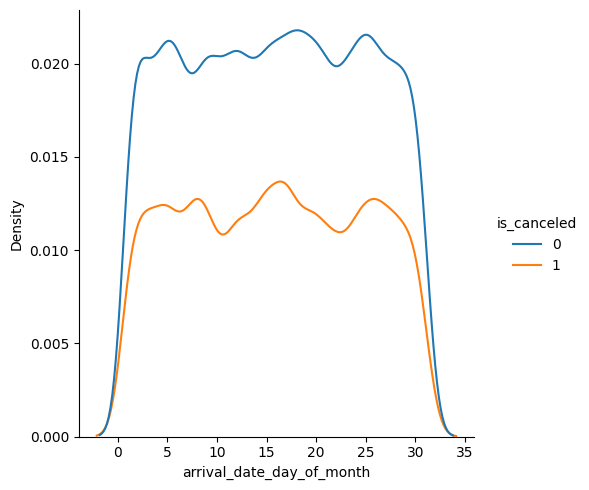

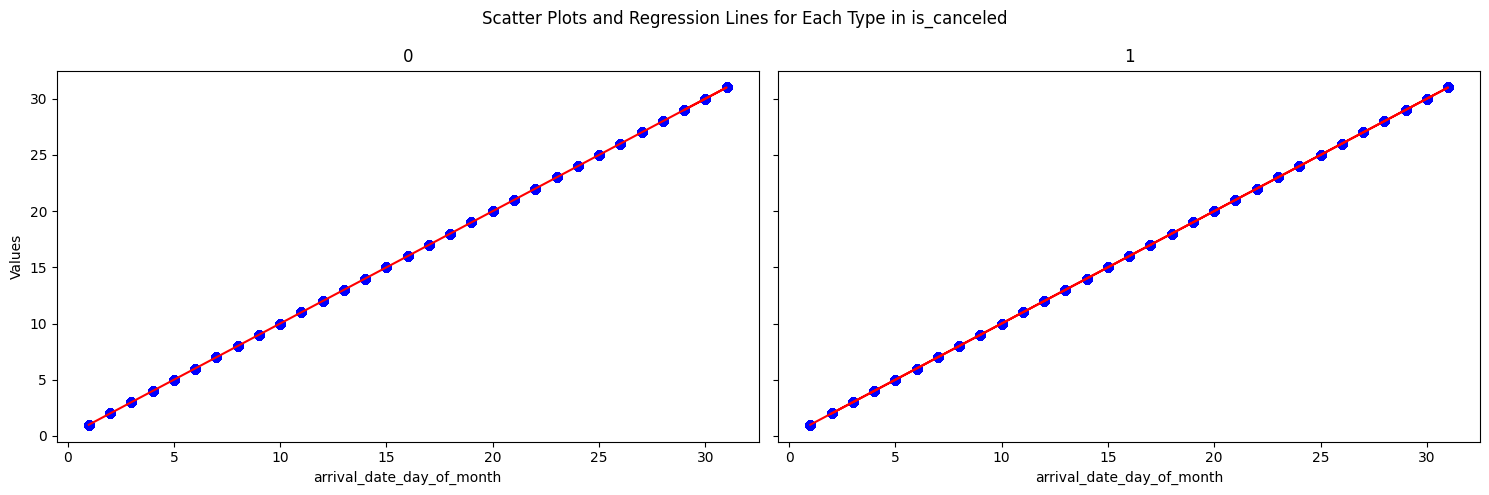

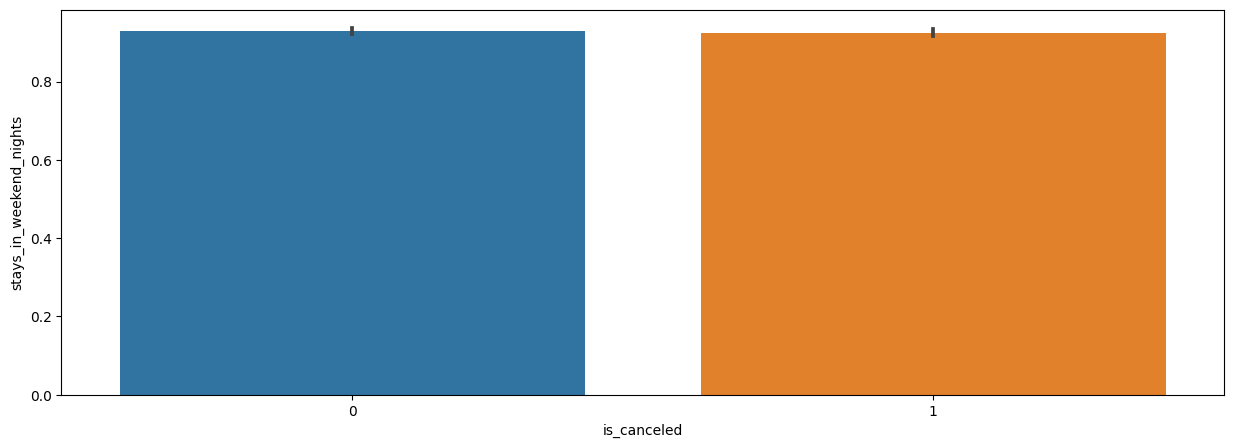

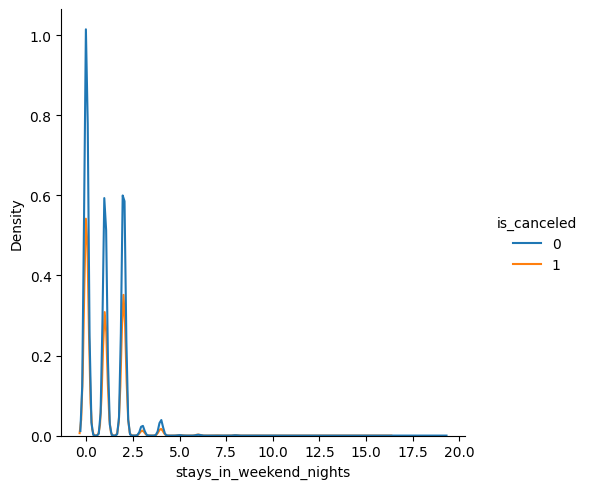

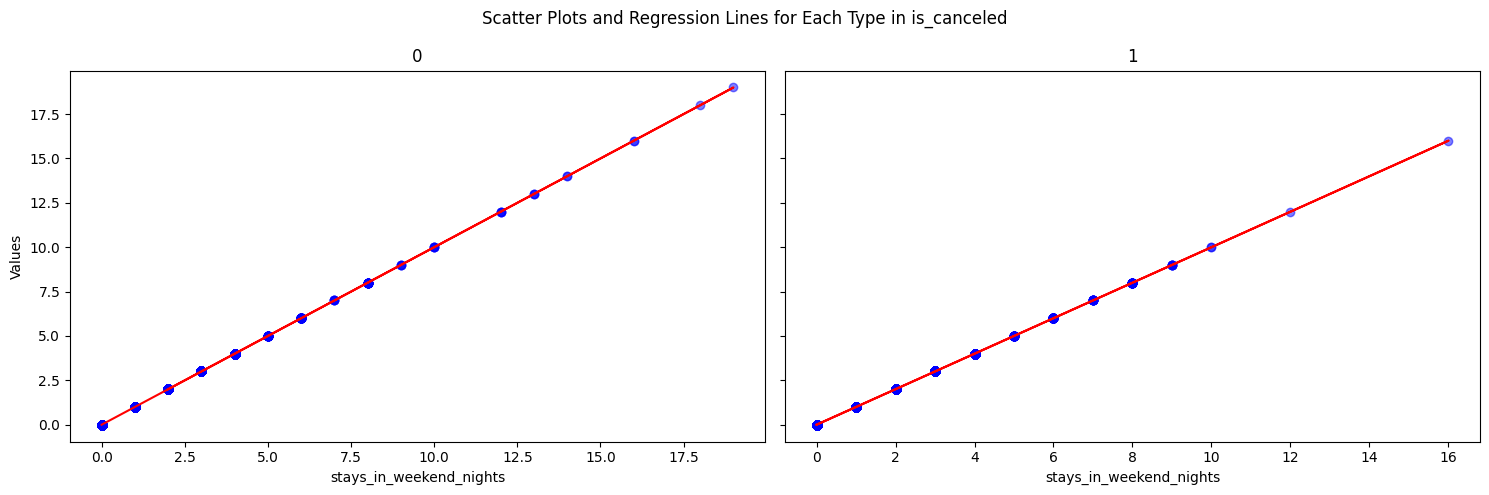

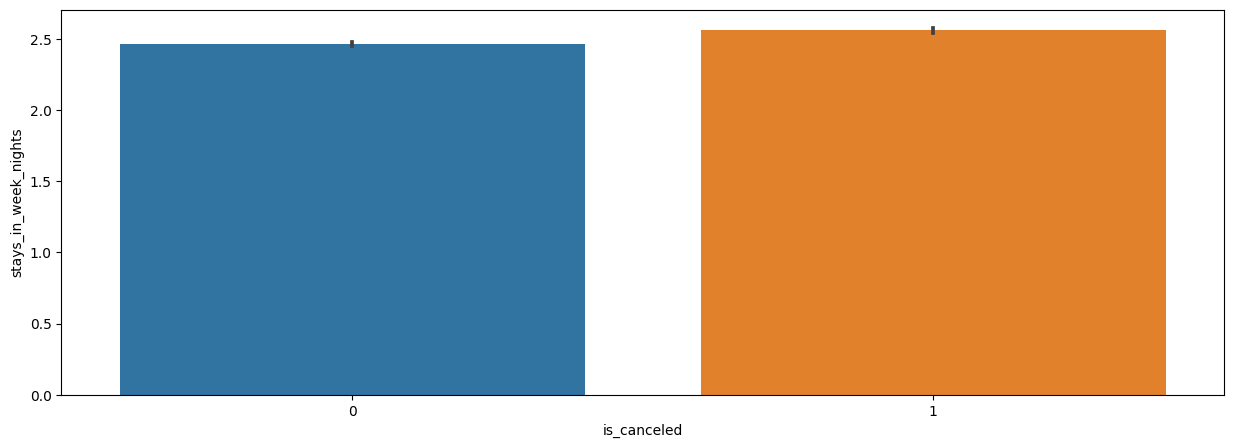

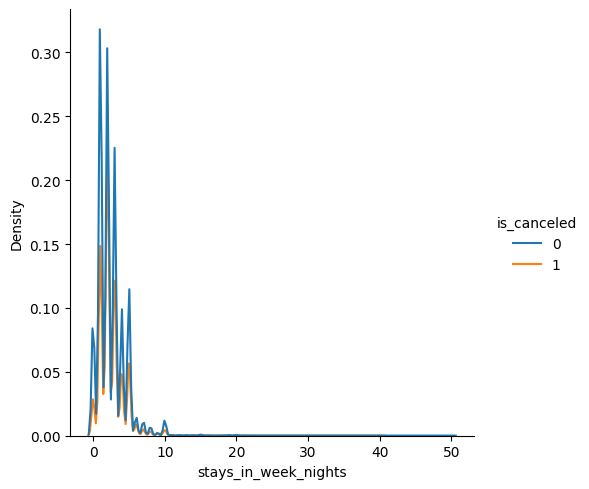

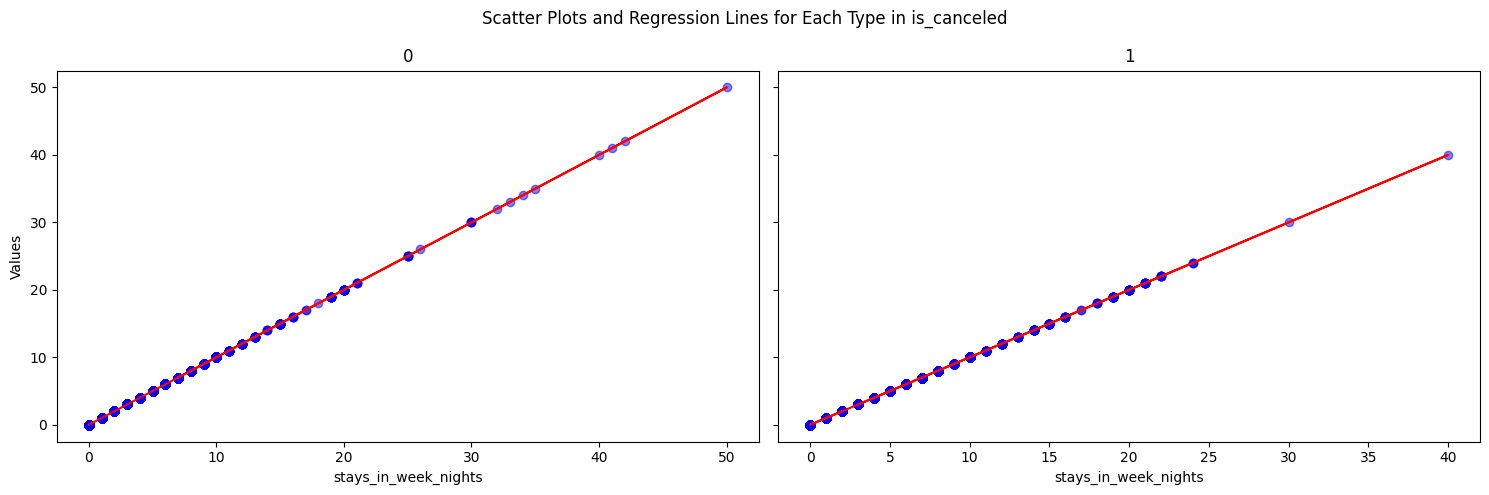

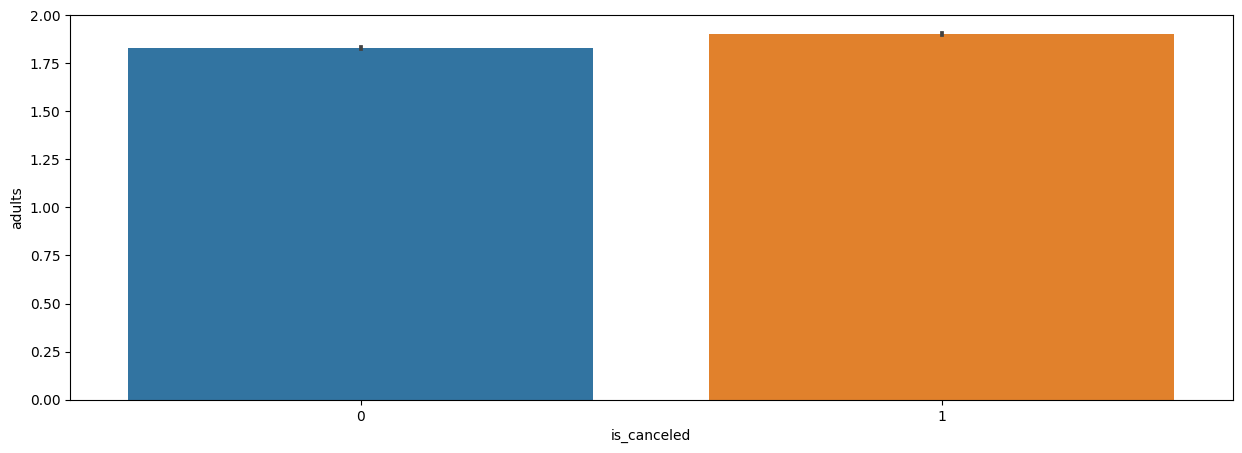

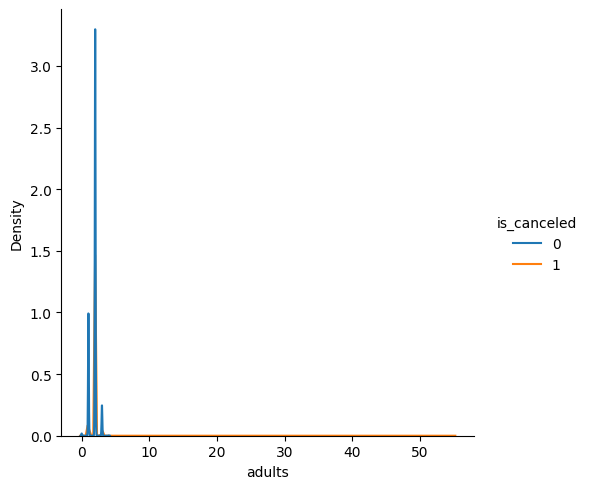

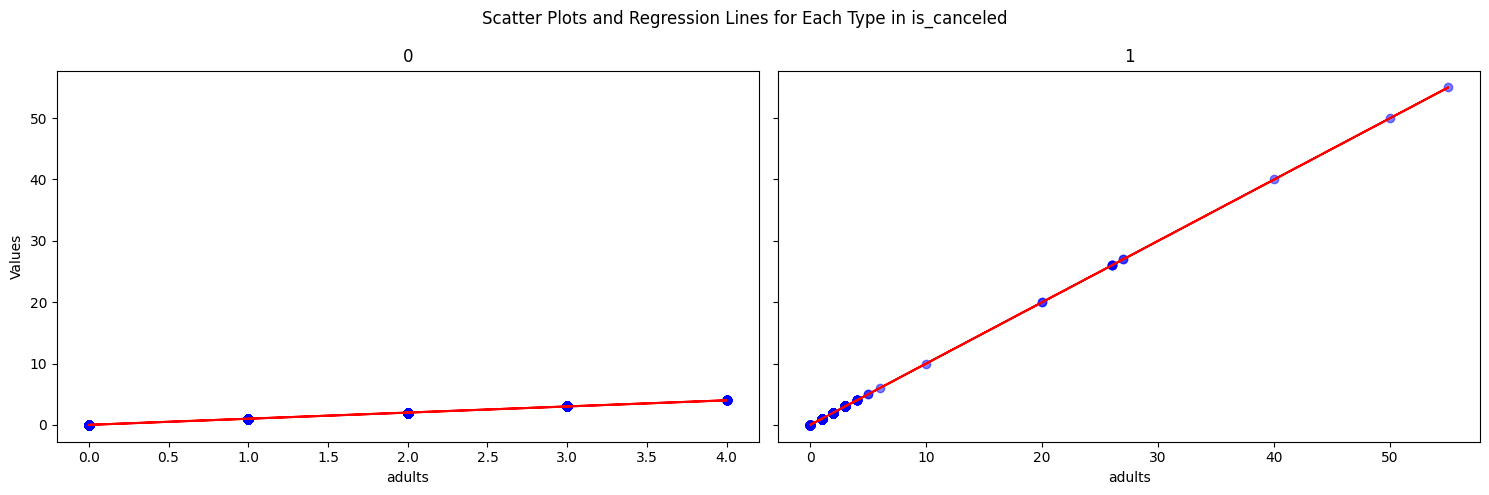

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

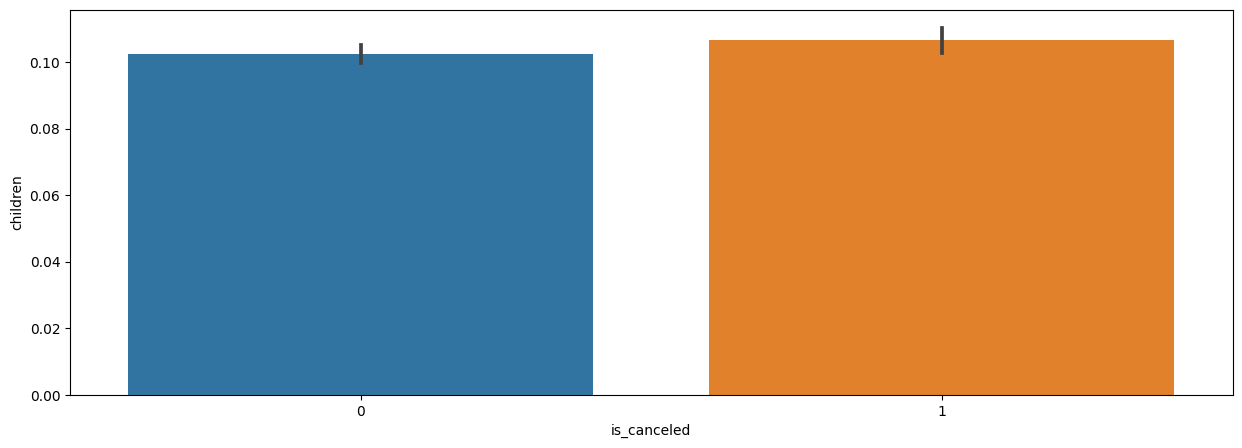

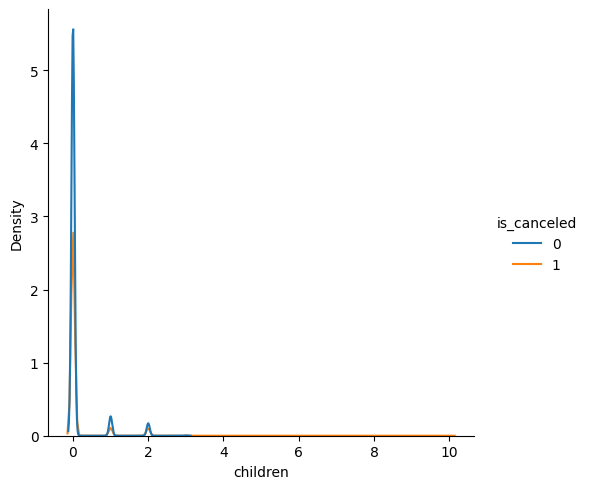

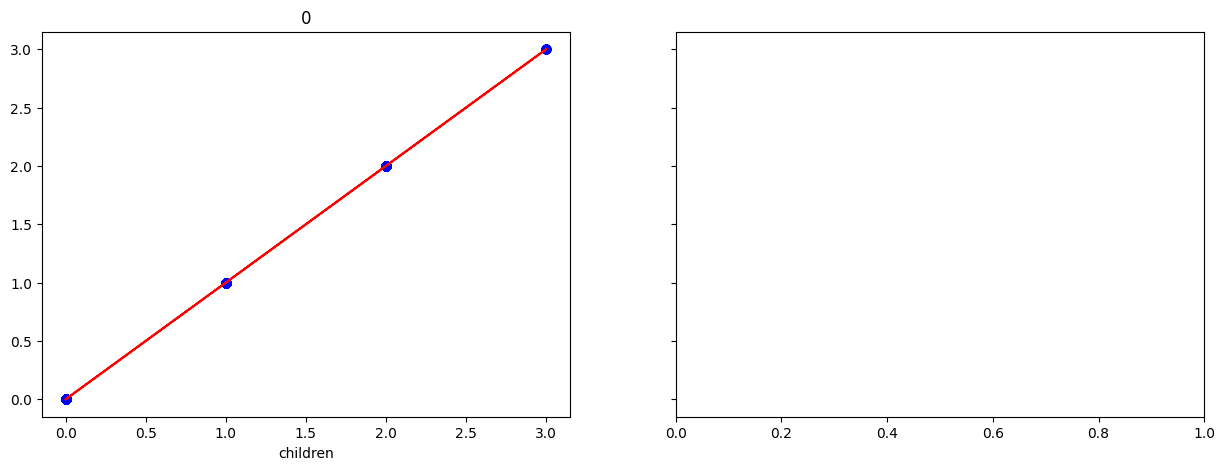

In [23]:
# Passo 2: Univariate Analysis (Distribution of individual features)
def bivariate_analysis(data, column_name):
    


    Objective_col = data.columns[1]

    # Visualization
    plt.figure(figsize=(15, 5))

    sns.barplot(data=data, x=Objective_col, y=column_name)
   # plt.savefig(f'bivariate_analysis/bar_plot_{column_name}.png')

    sns.displot(data=data, x= column_name, hue=Objective_col, kind="kde")
    #plt.savefig(f'bivariate_analysis/dis_plot_kde_{column_name}.png')

    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

    # Get unique values in the last_col (your categorical variable)
    unique_types = data[Objective_col].unique()

   
   # Loop over each unique type and perform linear regression
    for i, t in enumerate(unique_types):
        # Filter data for the current type
        subset = data[data[Objective_col] == t]
        
        X = subset[column_name].values.reshape(-1, 1)
        y = subset[column_name].values
        model = LinearRegression()
        model.fit(X, y)
        
        m = model.coef_[0]
        b = model.intercept_
        
        axes[i].scatter(X, y, color='blue', alpha=0.5)
        
        axes[i].plot(X, model.predict(X), color='red', label=f'y = {m:.2f}x + {b:.2f}')
        
        # Set the title to show the current type and regression equation
        axes[i].set_title(f'{t}')
        axes[i].set_xlabel(column_name)

    # Set the common ylabel for the whole figure
    axes[0].set_ylabel('Values')

    # Display the plot
    plt.suptitle(f'Scatter Plots and Regression Lines for Each Type in {Objective_col}')
 

    plt.tight_layout()
    #plt.savefig(f'bivariate_analysis/scatter_plot_{column_name}.png')
    plt.show()



variables_to_analyse=numerical_columns

# Realizar a análise bivariada para cada variável
for variable in variables_to_analyse:
    bivariate_analysis(data, variable)




In [42]:

categorical_columns = data.select_dtypes(include=['object', 'category']).columns
# Get the number of unique values for categorical columns
unique_values_per_categorical_column = data[categorical_columns].nunique()

# Print the result
print(unique_values_per_categorical_column)

# Function to display the counts of is_canceled for each unique value in the column
def display_cancellation_counts(data, column, top_n=10):
    unique_vals = data[column].nunique()
    
    # Group by the column and the 'is_canceled' column, and count occurrences
    grouped = data.groupby([column, 'is_canceled']).size().unstack(fill_value=0)
    
    if unique_vals <= top_n:
        # If the number of unique values is small, show all counts
        print(f"\nColumn: {column}")
        print(grouped)
    else:
        # If there are many unique values, show the top N values based on their total counts
        top_values = data[column].value_counts().head(top_n).index
        print(f"\nColumn: {column} (Top {top_n} out of {unique_vals} unique values)")
        print(grouped.loc[top_values])

# Apply the function for each column except 'is_canceled'
for column in categorical_columns:
     display_cancellation_counts(data, column)

reservation_status_date       926
name                        81503
email                      115889
phone-number               119390
credit_card                  9000
dtype: int64

Column: reservation_status_date (Top 10 out of 926 unique values)
is_canceled    0     1
2015-10-21    88  1373
2015-07-06    22   783
2016-11-25    77   713
2015-01-01     0   763
2016-01-18    32   593
2015-07-02     7   462
2016-12-07    67   383
2015-12-18    30   393
2016-02-09   118   294
2016-04-04   125   257

Column: name (Top 10 out of 81503 unique values)
is_canceled         0   1
Michael Johnson    31  17
Robert Smith       33  15
Michael Smith      27  20
John Smith         30  16
Christopher Smith  26  18
Jennifer Smith     27  15
James Smith        24  15
David Smith        24  12
Michael Williams   28   7
Christopher Jones  14  17

Column: email (Top 10 out of 115889 unique values)
is_canceled           0  1
Michael.C@gmail.com   4  2
Andrew_S@yandex.com   3  2
David.M@zoho.com      3  2
K

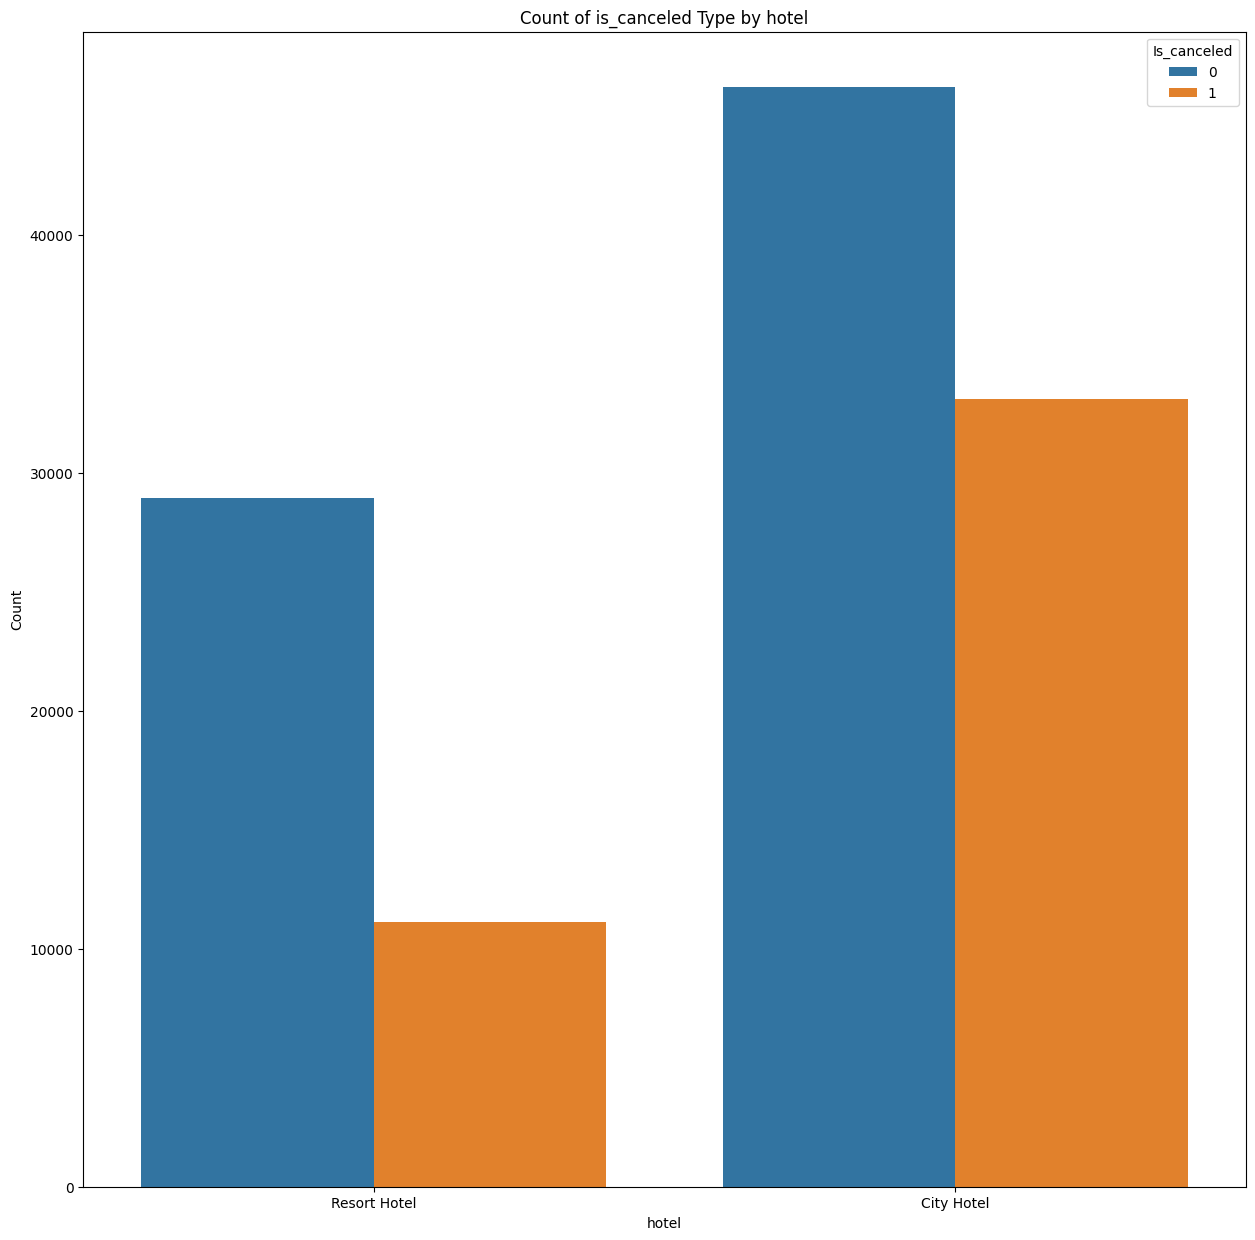

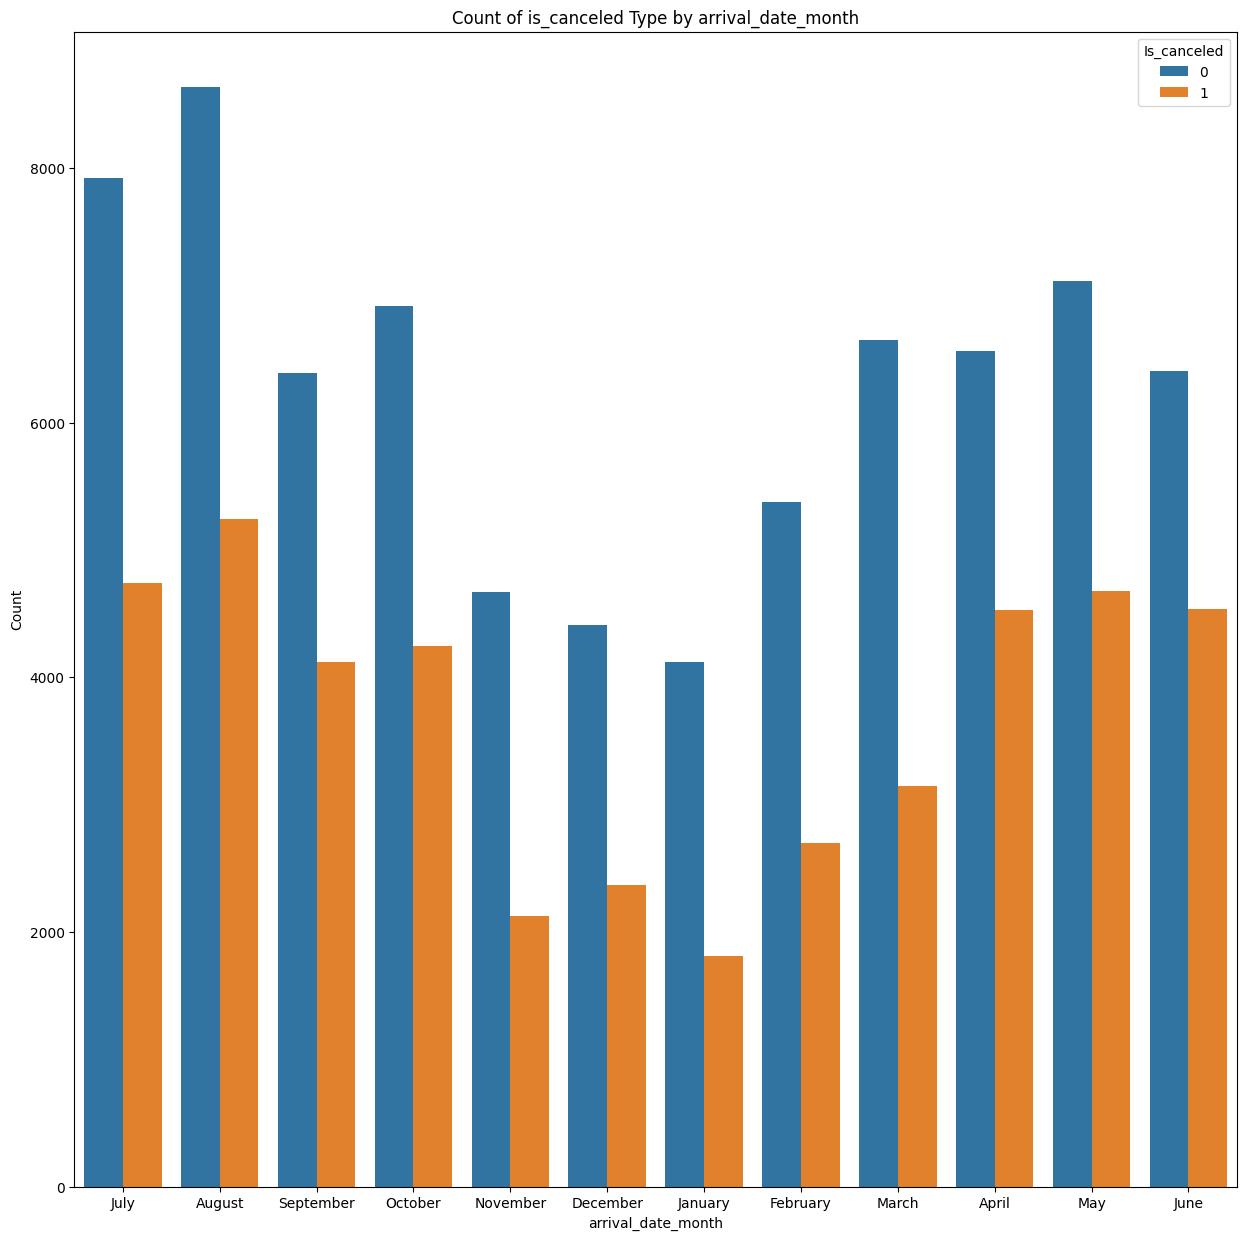

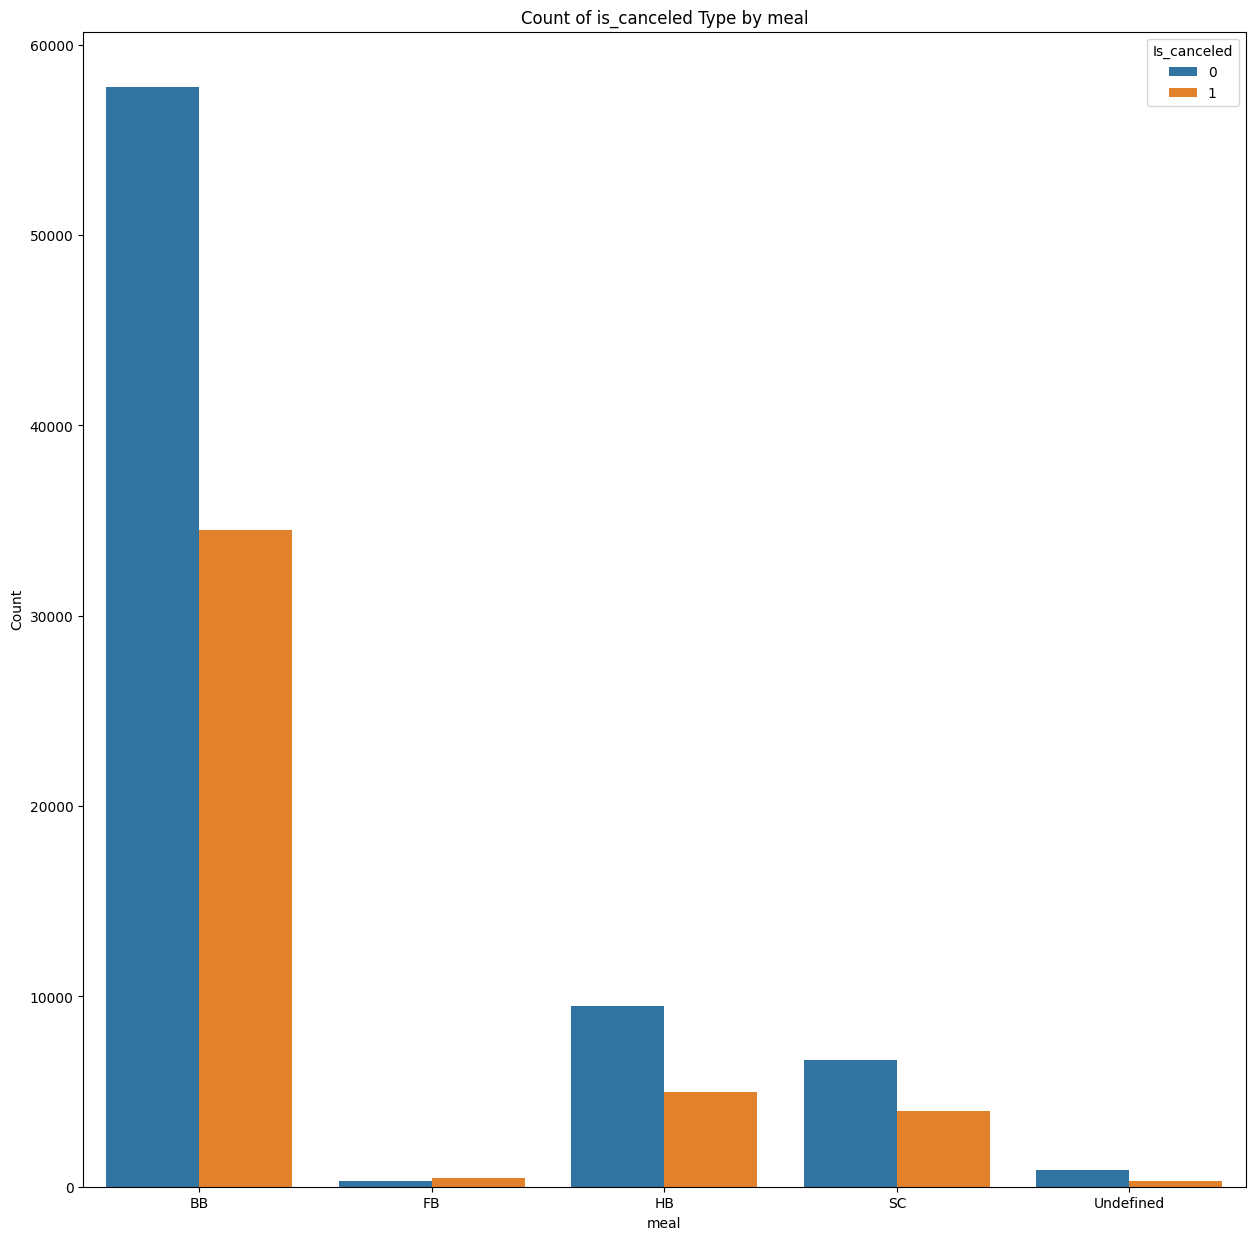

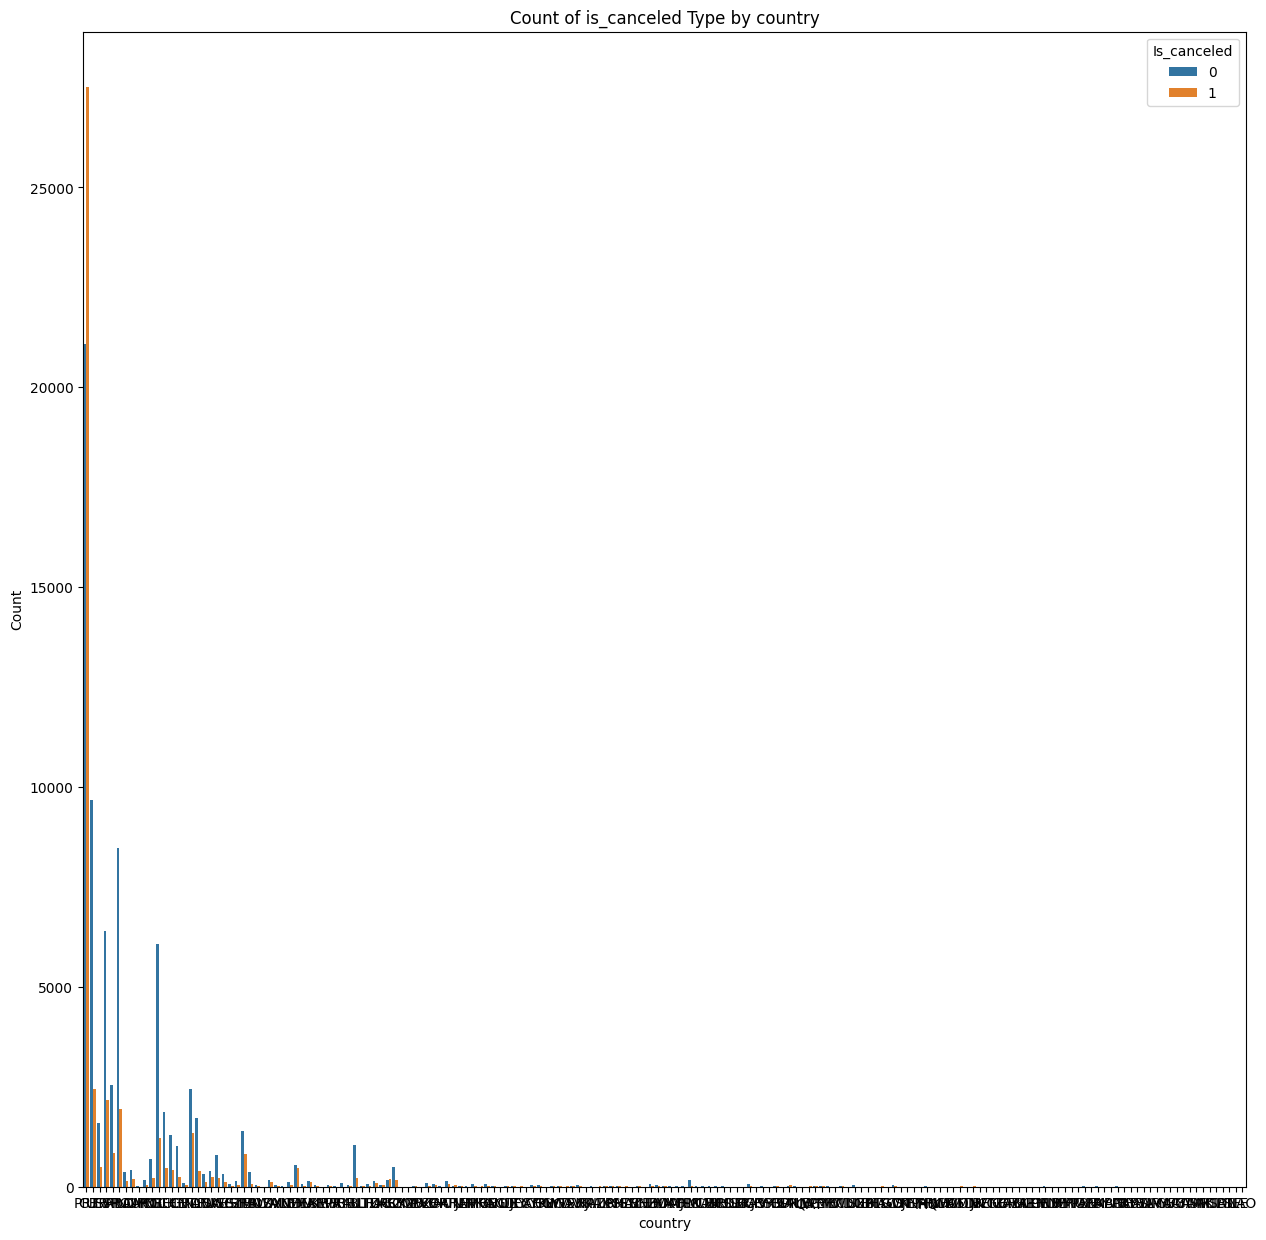

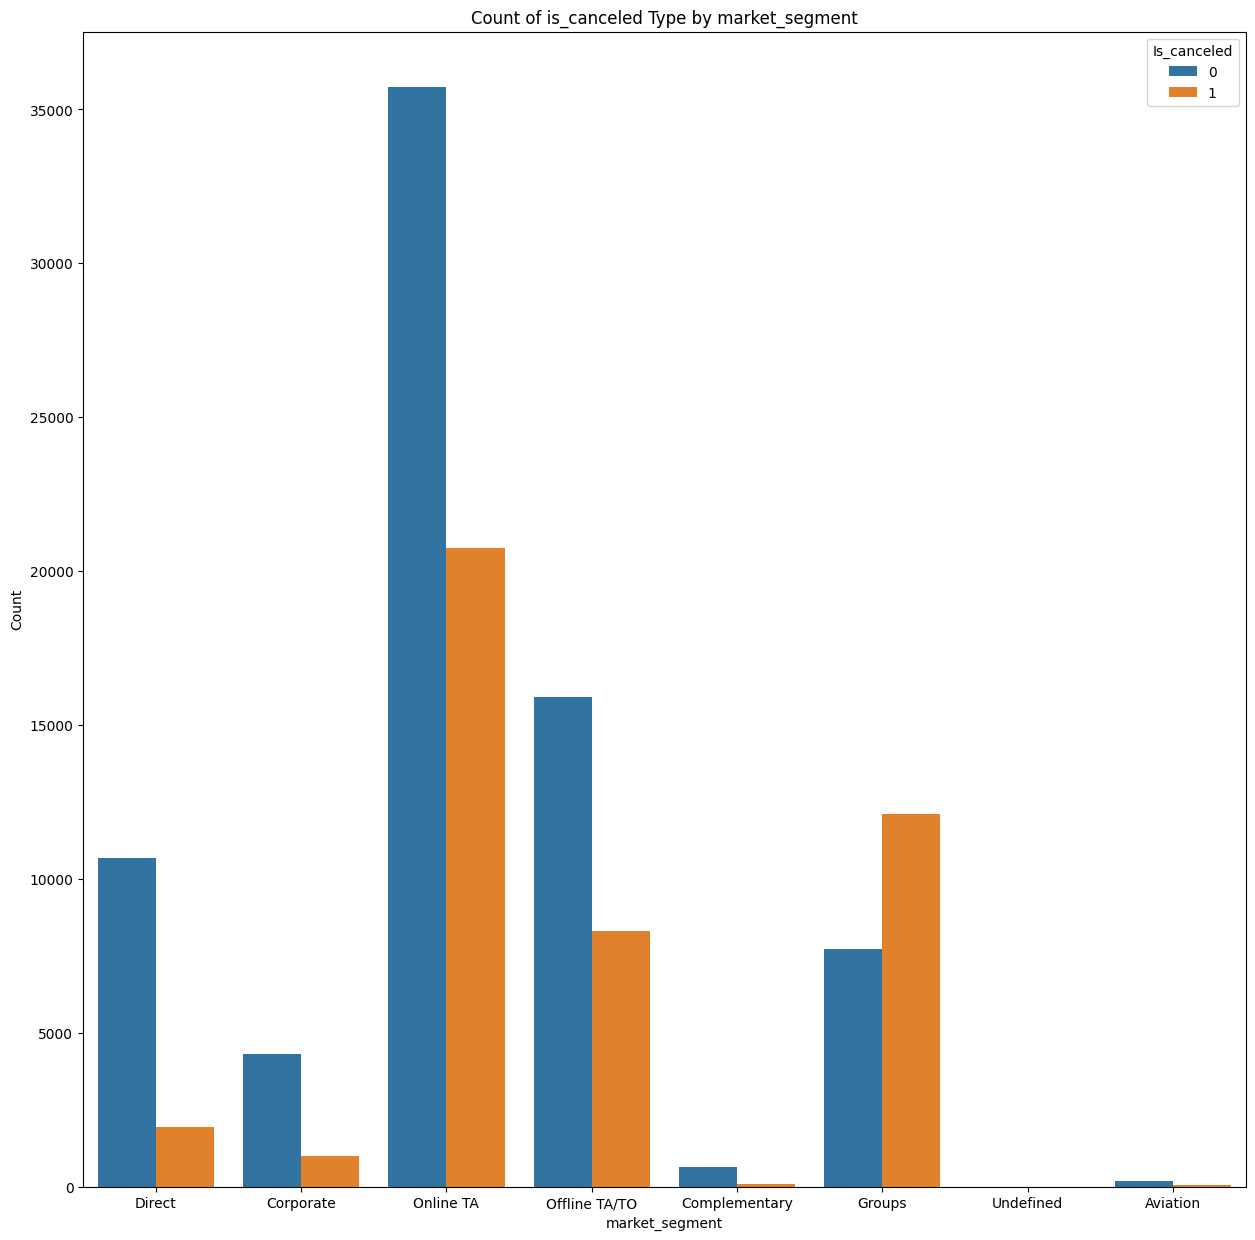

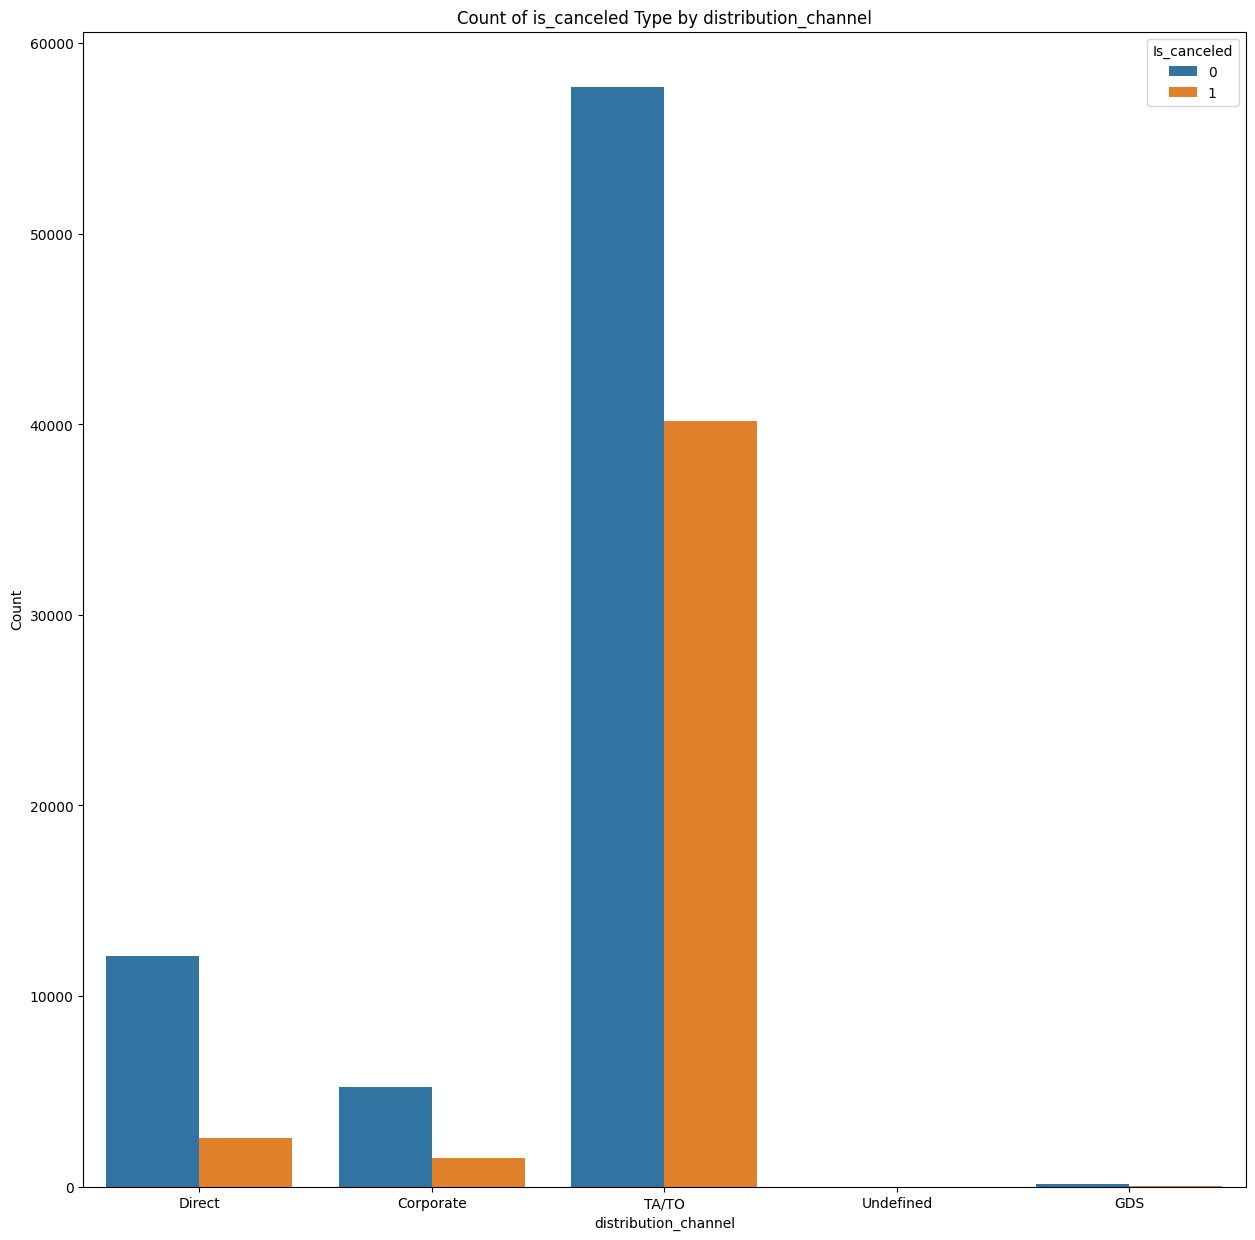

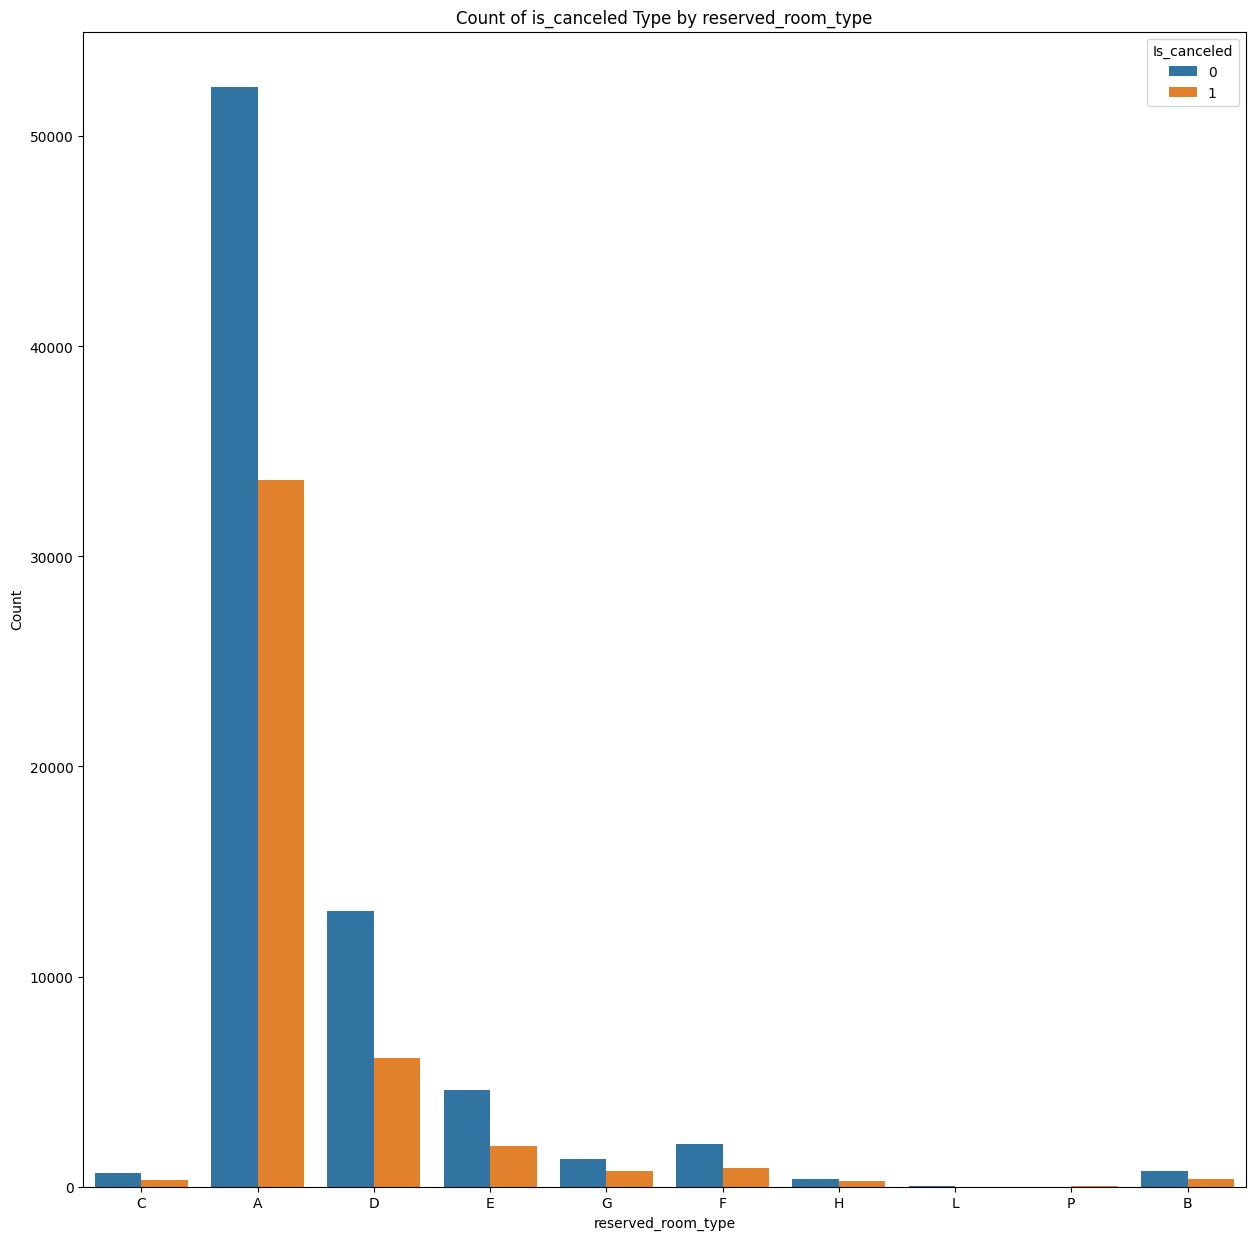

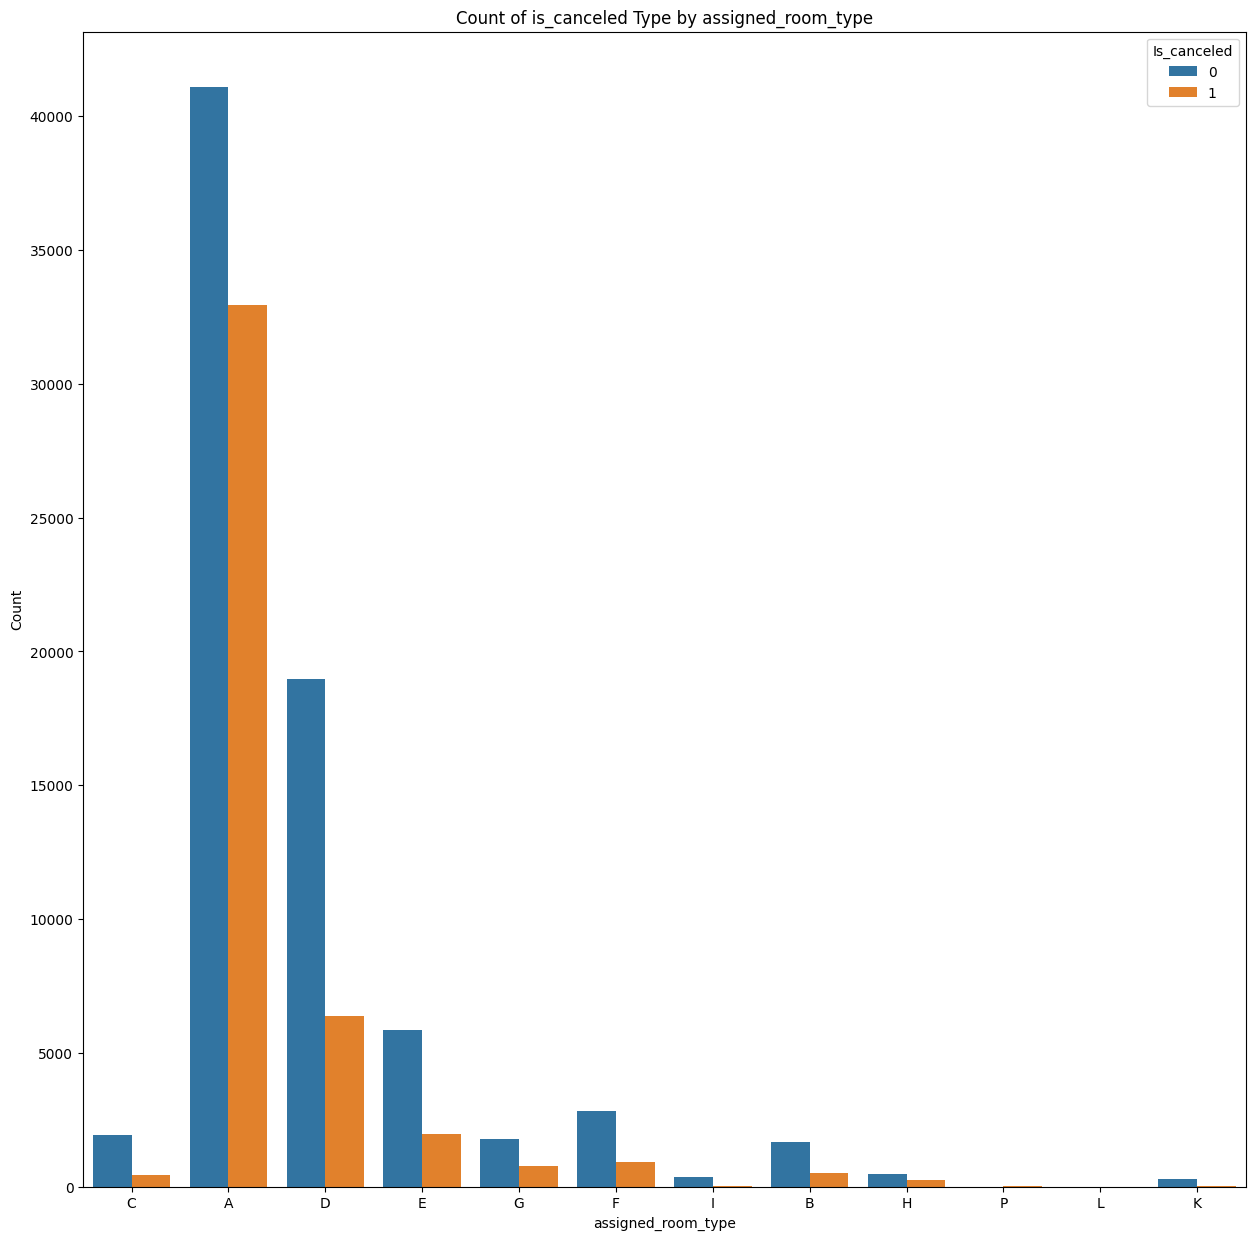

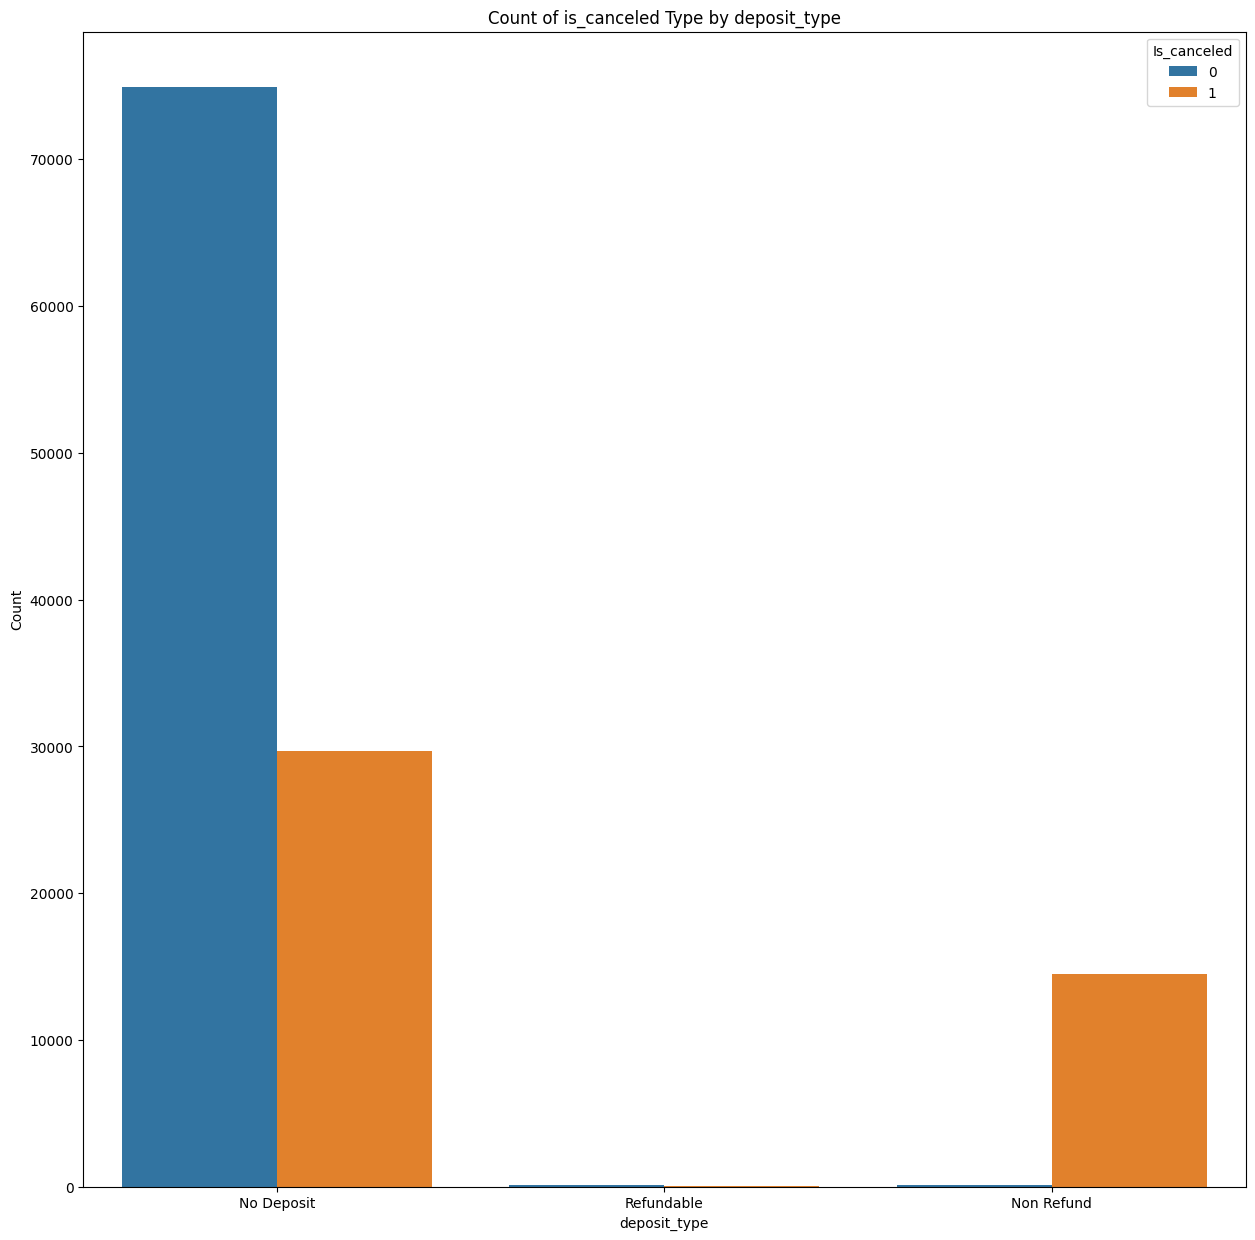

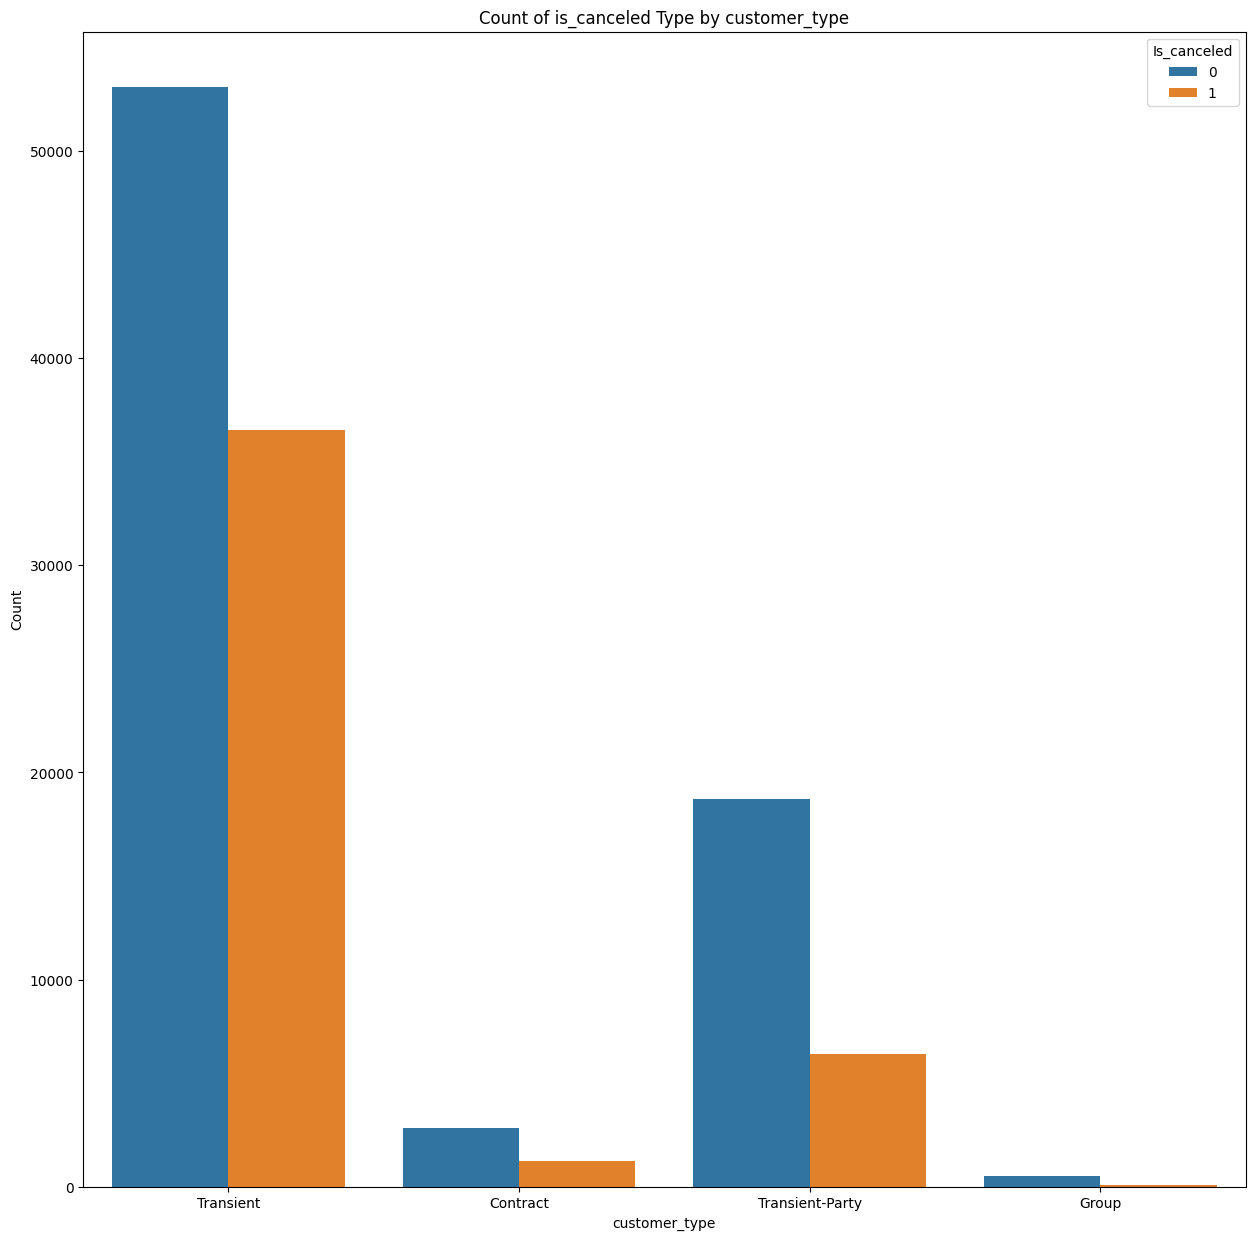

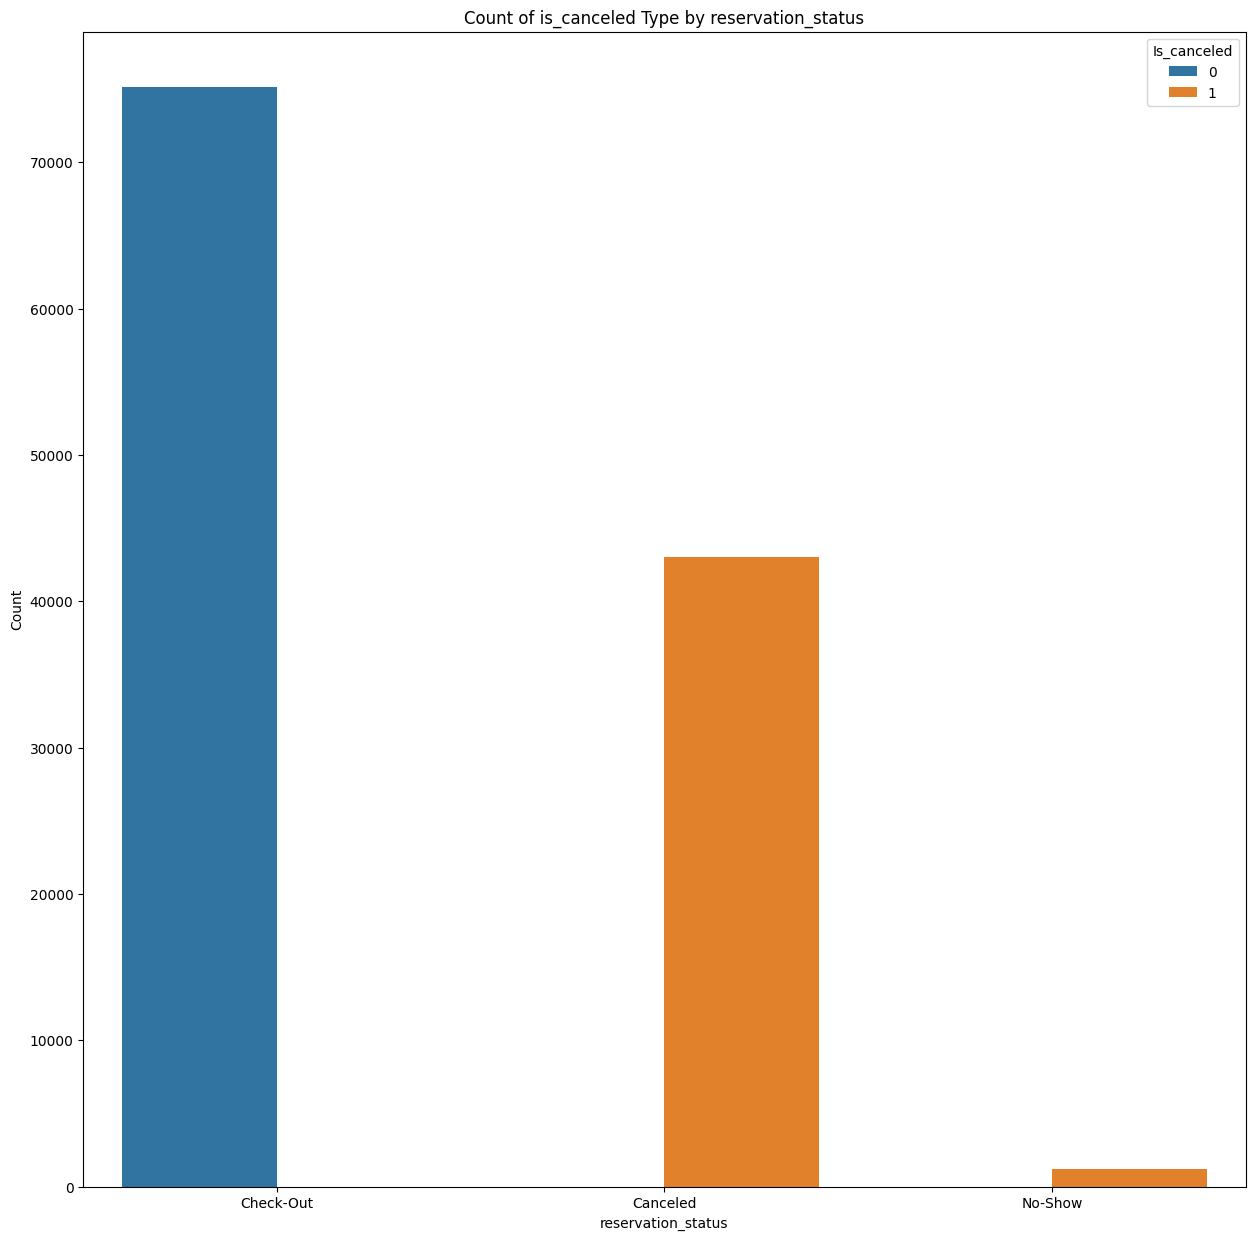

In [22]:

def bivariate_categorical(data, varaible):
    plt.figure(figsize=(15, 15))

    sns.countplot(data=data, x=variable, hue=data['is_canceled'])
    # Add labels and title
    plt.xlabel(f'{variable}')
    plt.ylabel('Count')
    plt.title('Count of is_canceled Type by 'f'{variable}')
    plt.legend(title='Is_canceled')


    plt.show()

for variable in categorical_columns:
    bivariate_categorical(data, variable)

   


In [19]:
from sklearn.model_selection import train_test_split

# Define the target variable and features
X = pre_processed_data
y = data['is_canceled']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (95512, 259)
Testing data shape: (23878, 259)


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Define the preprocessing steps for numerical and categorical features
numerical_features = numerical_columns
categorical_features = categorical_columns

# Numerical features preprocessing pipeline
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical features preprocessing pipeline
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both pipelines into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Apply the preprocessing to the data
pre_processed_data = preprocessor.fit_transform(data)

print(pre_processed_data)

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [13]:
# Train a RandomForestClassifier on the pre-processed data

# Define the target variable and features
X = pre_processed_data
y = data['is_canceled']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14907
           1       1.00      1.00      1.00      8971

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



In [14]:
from sklearn.model_selection import cross_val_score

# Evaluate the RandomForestClassifier using cross-validation


# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0


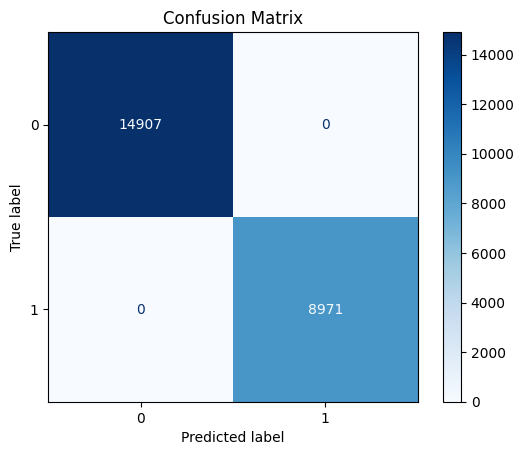

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluate the RandomForestClassifier using a confusion matrix


# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Top 10 most important features:
                          Feature  Importance
257  reservation_status_Check-Out    0.361612
256   reservation_status_Canceled    0.246076
0                     is_canceled    0.227962
250       deposit_type_Non Refund    0.025798
249       deposit_type_No Deposit    0.025400
172                   country_PRT    0.022334
11         previous_cancellations    0.010142
1                       lead_time    0.007980
17      total_of_special_requests    0.007854
258    reservation_status_No-Show    0.006262


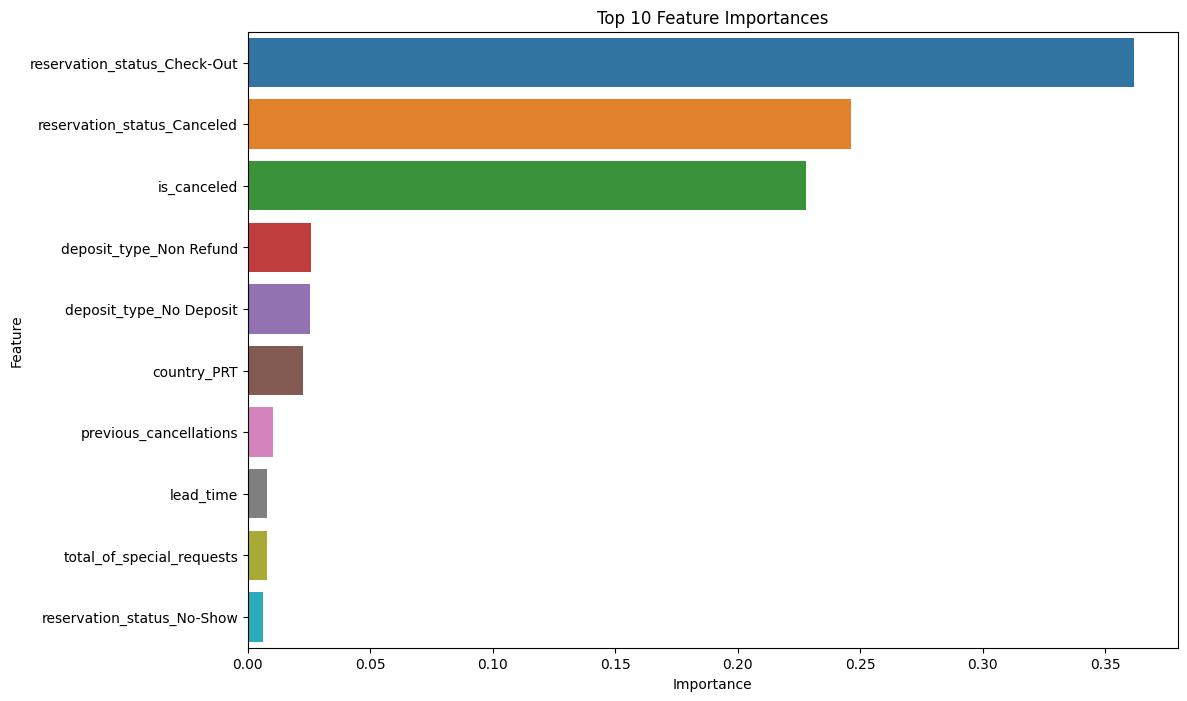

In [16]:
# Perform feature importance analysis using the trained RandomForestClassifier

# Get feature importances from the RandomForestClassifier
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
feature_names = numerical_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("Top 10 most important features:")
print(feature_importance_df.head(10))

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

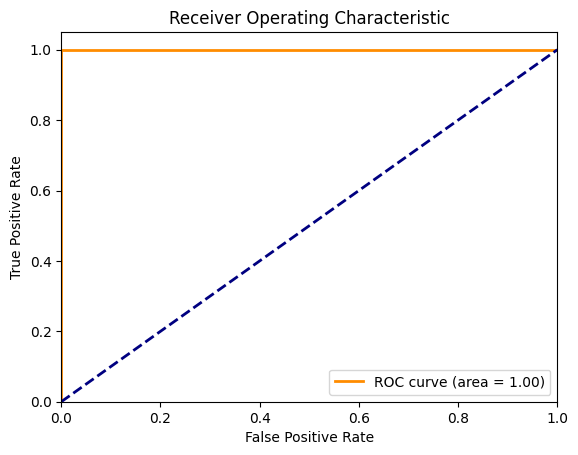

In [17]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Precision: 1.00
Recall: 1.00
F1-score: 1.00
